##**Installing the transformers library**



In [ ]:
!pip install transformers

     |████████████████████████████████| 1.9MB 6.3MB/s 
     |████████████████████████████████| 890kB 22.6MB/s 
     |████████████████████████████████| 3.2MB 30.4MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp37-none-any.whl size=893262 sha256=9fd9e1f8787156175b42290536800c9b60d9b4e80c8e61b465aa8934892d35b4
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


##**Importing the tools**

In [ ]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import torch
import transformers as ppb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
import re
warnings.filterwarnings('ignore')

##**Importing the dataset from Drive**

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Mozilla
df1=pd.read_csv('gdrive/My Drive/cln_copie_dup_total1.csv',delimiter=';')
df2=pd.read_csv('gdrive/My Drive/cln_copie_nndup_total1.csv',delimiter=';')

In [ ]:
#Thunderbird
df1=pd.read_csv('gdrive/My Drive/test_dup_TB.csv',delimiter=';')
df2=pd.read_csv('gdrive/My Drive/test_Nondup_TB.csv',delimiter=';')

In [ ]:
#Eclipse
df1=pd.read_csv('gdrive/My Drive/EP_test_dup.csv',delimiter=';')
df2=pd.read_csv('gdrive/My Drive/EP_test_nondup.csv',delimiter=';')

In [ ]:
df1['Label'] = 1
df2['Label'] = 0

In [ ]:
df1['Label']

0        1
1        1
2        1
3        1
4        1
        ..
11971    1
11972    1
11973    1
11974    1
11975    1
Name: Label, Length: 11976, dtype: int64

##**Loading the Pre-trained BERT model**

In [ ]:
model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

# **Remove stop words**

In [ ]:
df1['Title1']= df1['Title1'].str.replace(r'i' 'me' 'my' 'myself' 'we' 
                                         'our' 'ours' 'ourselves' 'you' 'your' 'yours' 'yourself''yourselves' 'they' 'we' 'him' 'he' 'him' 'his' 'himself' 'she' 'her' 'hers' 'herself' 'it''its' 'itself' 'they' 'them' 'their' 'theirs' 'themselves'  'what' 'which' 'who' 'whom' 'this' 'that'
                                         'these' 'those' 'am' 'is' 'are' 'was' 'were' 'be' 'been' 'being' 'have' 'has' 'had' 'having' 'do' 'does' 'did' 'doing' 'a' 'an' 'the' 'and' 'but' 'if' 'or' 'because' 'as' 'until' 'while' 'of' 'at' 'by' 'for' 'with' 'about' 'against' 'between' 'into' 'through' 
                                         'during' 'before' 'after' 'above' 'below' 'to' 'from' 'up' 'down' 'in' 'out' 'on' 'off' 'over' 'under' 'again' 'further' 'then' 'once'  'here' 'there' 'when' 'where' 'why' 'how' 'all' 'any' 'both' 'each' 'few' 'more' 'most' 'other' 'some' 'such' 'no' 'nor' 'not' 'only' 'own' 'same' 'so' 'than' 'too' 'very' 's' 't' 'can' 'will' 'just' 'don' 'should' 'now'
                                         'java' 'com' 'org' ,'')


df1['Title2']= df1['Title2'].str.replace(r'i' 'me' 'my' 'myself' 'we' 
                                         'our' 'ours' 'ourselves' 'you' 'your' 'yours' 'yourself''yourselves' 'they' 'we' 'him' 'he' 'him' 'his' 'himself' 'she' 'her' 'hers' 'herself' 'it''its' 'itself' 'they' 'them' 'their' 'theirs' 'themselves'  'what' 'which' 'who' 'whom' 'this' 'that'
                                         'these' 'those' 'am' 'is' 'are' 'was' 'were' 'be' 'been' 'being' 'have' 'has' 'had' 'having' 'do' 'does' 'did' 'doing' 'a' 'an'
                                         'the' 'and' 'but' 'if' 'or' 'because' 'as' 'until' 'while' 'of' 'at' 'by' 'for' 'with' 'about' 'against' 'between' 'into' 'through' 'during' 'before' 'after' 'above' 'below' 'to' 'from' 'up' 'down' 'in' 'out' 'on' 'off' 'over' 'under' 'again' 'further' 'then' 'once' 'here' 'there' 'when' 'where' 'why' 'how' 'all' 'any' 'both' 'each' 'few' 'more' 'most' 'other' 'some' 'such' 'no' 'nor' 'not' 'only' 'own' 
                                         'same' 'so' 'than' 'too' 'very' 's' 't' 'can' 'will' 'just' 'don' 'should' 'now'
                                         'java' 'com' 'org' ,'')

df2['Title1']= df2['Title1'].str.replace(r'i' 'me' 'my' 'myself' 'we' 'our' 'ours' 'ourselves' 'you' 'your' 'yours' 'yourself''yourselves' 'they' 'we' 'him' 'he' 'him' 'his' 'himself' 'she'
                                         'her' 'hers' 'herself' 'it''its' 'itself' 'they' 'them' 'their' 'theirs' 'themselves'  'what' 'which' 'who' 'whom' 'this' 'that' 'these' 'those' 'am' 'is' 'are' 'was' 'were' 'be' 'been' 'being' 'have' 'has' 'had' 'having' 'do' 'does' 'did' 'doing' 'a' 'an'
                                         'the' 'and' 'but' 'if' 'or' 'because' 'as' 'until' 'while' 'of' 'at' 'by' 'for' 'with' 'about' 'against' 'between' 'into' 'through' 
                                         'during' 'before' 'after' 'above' 'below' 'to' 'from' 'up' 'down' 'in' 'out' 'on' 'off' 'over' 'under' 'again' 'further' 'then' 'once' 'here' 'there' 'when' 'where' 'why' 'how' 'all' 'any' 'both' 'each' 'few' 'more' 'most' 'other' 'some' 'such' 'no' 'nor' 'not' 'only' 'own' 'same' 'so' 'than' 'too' 'very' 's' 't' 'can' 'will' 'just' 'don' 'should' 'now'
                                         'java' 'com' 'org' ,'')


df2['Title2']= df2['Title2'].str.replace(r'i' 'me' 'my' 'myself' 'we' 'our' 'ours' 'ourselves' 'you' 'your' 'yours' 'yourself''yourselves' 'they' 'we' 'him' 'he' 'him' 'his' 'himself' 'she'
                                         'her' 'hers' 'herself' 'it''its' 'itself' 'they' 'them' 'their' 'theirs' 'themselves'  'what' 'which' 'who' 'whom' 'this' 'that' 'these' 'those' 'am' 'is' 'are' 'was' 'were' 'be' 'been' 'being' 'have' 'has' 'had' 'having' 'do' 'does' 'did' 'doing' 'a' 'an'
                                         'the' 'and' 'but' 'if' 'or' 'because' 'as' 'until' 'while' 'of' 'at' 'by' 'for' 'with' 'about' 'against' 'between' 'into' 'through' 
                                         'during' 'before' 'after' 'above' 'below' 'to' 'from' 'up' 'down' 'in' 'out' 'on' 'off' 'over' 'under' 'again' 'further' 'then' 'once' 'here' 'there' 'when' 'where' 'why' 'how' 'all' 'any' 'both' 'each' 'few' 'more' 'most' 'other' 'some' 'such' 'no' 'nor' 'not' 'only' 'own' 
                                         'same' 'so' 'than' 'too' 'very' 's' 't' 'can' 'will' 'just' 'don' 'should' 'now'
                                         'java' 'com' 'org' ,'')

df1['Description1']= df1['Description1'].str.replace(r'i' 'me' 'my' 'myself' 'we'  'our' 'ours' 'ourselves' 'you' 'your' 'yours' 'yourself''yourselves' 'they' 'we' 'him' 'he' 'him' 'his' 'himself' 'she'
                                         'her' 'hers' 'herself' 'it''its' 'itself' 'they' 'them' 'their' 'theirs' 'themselves'  'what' 'which' 'who' 'whom' 'this' 'that' 'these' 'those' 'am' 'is' 'are' 'was' 'were' 'be' 'been' 'being' 'have' 'has' 'had' 'having' 'do' 'does' 'did' 'doing' 'a' 'an' 'the' 'and' 'but' 'if' 'or' 'because' 'as' 'until' 'while' 'of' 'at' 'by' 'for' 'with' 'about' 'against' 'between' 'into' 'through' 
                                         'during' 'before' 'after' 'above' 'below' 'to' 'from' 'up' 'down' 'in' 'out' 'on' 'off' 'over' 'under' 'again' 'further' 'then' 'once' 
                                         'here' 'there' 'when' 'where' 'why' 'how' 'all' 'any' 'both' 'each' 'few' 'more' 'most' 'other' 'some' 'such' 'no' 'nor' 'not' 'only' 'own' 'same' 'so' 'than' 'too' 'very' 's' 't' 'can' 'will' 'just' 'don' 'should' 'now'
                                         'java' 'com' 'org' ,'')

df1['Description2']= df1['Description2'].str.replace(r'i' 'me' 'my' 'myself' 'we' 'our' 'ours' 'ourselves' 'you' 'your' 'yours' 'yourself''yourselves' 'they' 'we' 'him' 'he' 'him' 'his' 'himself' 'she'
                                         'her' 'hers' 'herself' 'it''its' 'itself' 'they' 'them' 'their' 'theirs' 'themselves'  'what' 'which' 'who' 'whom' 'this' 'that' 'these' 'those' 'am' 'is' 'are' 'was' 'were' 'be' 'been' 'being' 'have' 'has' 'had' 'having' 'do' 'does' 'did' 'doing' 'a' 'an'
                                         'the' 'and' 'but' 'if' 'or' 'because' 'as' 'until' 'while' 'of' 'at' 'by' 'for' 'with' 'about' 'against' 'between' 'into' 'through' 
                                         'during' 'before' 'after' 'above' 'below' 'to' 'from' 'up' 'down' 'in' 'out' 'on' 'off' 'over' 'under' 'again' 'further' 'then' 'once' 'here' 'there' 'when' 'where' 'why' 'how' 'all' 'any' 'both' 'each' 'few' 'more' 'most' 'other' 'some' 'such' 'no' 'nor' 'not' 'only' 'own' 
                                         'same' 'so' 'than' 'too' 'very' 's' 't' 'can' 'will' 'just' 'don' 'should' 'now'
                                         'java' 'com' 'org' ,'')

df2['Description1']= df2['Description1'].str.replace(r'i' 'me' 'my' 'myself' 'we' 'our' 'ours' 'ourselves' 'you' 'your' 'yours' 'yourself''yourselves' 'they' 'we' 'him' 'he' 'him' 'his' 'himself' 'she'
                                         'her' 'hers' 'herself' 'it''its' 'itself' 'they' 'them' 'their' 'theirs' 'themselves'  'what' 'which' 'who' 'whom' 'this' 'that' 'these' 'those' 'am' 'is' 'are' 'was' 'were' 'be' 'been' 'being' 'have' 'has' 'had' 'having' 'do' 'does' 'did' 'doing' 'a' 'an'
                                         'the' 'and' 'but' 'if' 'or' 'because' 'as' 'until' 'while' 'of' 'at' 'by' 'for' 'with' 'about' 'against' 'between' 'into' 'through' 'during' 'before' 'after' 'above' 'below' 'to' 'from' 'up' 'down' 'in' 'out' 'on' 'off' 'over' 'under' 'again' 'further' 'then' 'once' 
                                         'here' 'there' 'when' 'where' 'why' 'how' 'all' 'any' 'both' 'each' 'few' 'more' 'most' 'other' 'some' 'such' 'no' 'nor' 'not' 'only' 'own' 'same' 'so' 'than' 'too' 'very' 's' 't' 'can' 'will' 'just' 'don' 'should' 'now'
                                         'java' 'com' 'org' ,'')

df2['Description2']= df2['Description2'].str.replace(r'i' 'me' 'my' 'myself' 'we' 'our' 'ours' 'ourselves' 'you' 'your' 'yours' 'yourself''yourselves' 'they' 'we' 'him' 'he' 'him' 'his' 'himself' 'she'
                                         'her' 'hers' 'herself' 'it''its' 'itself' 'they' 'them' 'their' 'theirs' 'themselves'  'what' 'which' 'who' 'whom' 'this' 'that' 'these' 'those' 'am' 'is' 'are' 'was' 'were' 'be' 'been' 'being' 'have' 'has' 'had' 'having' 'do' 'does' 'did' 'doing' 'a' 'an'
                                         'the' 'and' 'but' 'if' 'or' 'because' 'as' 'until' 'while' 'of' 'at' 'by' 'for' 'with' 'about' 'against' 'between' 'into' 'through' 'during' 'before' 'after' 'above' 'below' 'to' 'from' 'up' 'down' 'in' 'out' 'on' 'off' 'over' 'under' 'again' 'further' 'then' 'once' 
                                         'here' 'there' 'when' 'where' 'why' 'how' 'all' 'any' 'both' 'each' 'few' 'more' 'most' 'other' 'some' 'such' 'no' 'nor' 'not' 'only' 'own'  'same' 'so' 'than' 'too' 'very' 's' 't' 'can' 'will' 'just' 'don' 'should' 'now'
                                         'java' 'com' 'org' ,'')






In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

#stop = stopwords.words('english')
stop_words = stopwords.words('english')
newStopWords = ['java','com','org']
stop_words.extend(newStopWords)
df1['Title1'] = np.array(df1['Title1'].apply(lambda x: [item for item in x if item not in stop_words]))
df1['Title2'] = np.array(df1['Title2'].apply(lambda x: [item for item in x if item not in stop_words]))
df1['Description1'] = np.array(df1['Description1'].apply(lambda x: [item for item in x if item not in stop_words]))
df1['Description2'] = np.array(df1['Description2'].apply(lambda x: [item for item in x if item not in stop_words]))

df1['Title1'] = df1['Title1'].apply((lambda x: item for item in x if item not in stop_words))

df2['Title1'] = np.array(df2['Title1'].apply(lambda x: [item for item in x if item not in stop_words]))
df2['Title2'] = np.array(df2['Title2'].apply(lambda x: [item for item in x if item not in stop_words]))
df2['Description1'] = np.array(df2['Description1'].apply(lambda x: [item for item in x if item not in stop_words]))
df2['Description2'] = np.array(df2['Description2'].apply(lambda x: [item for item in x if item not in stop_words]))

##**Lower case**

In [ ]:
df[0]= df[0].str.lower()
df[1]= df[1].str.lower()
df[2]= df[2].str.lower()
df[3]= df[3].str.lower()
df[4]= df[4].str.lower()
df[5]= df[5].str.lower()

NameError: ignored

## **Remove Digits**

In [ ]:
df[3] = df[3].str.replace(r'0', '')
df[3] = df[3].str.replace(r'1', '')
df[3] = df[3].str.replace(r'2', '')
df[3] = df[3].str.replace(r'3', '')
df[3] = df[3].str.replace(r'4', '')
df[3] = df[3].str.replace(r'5', '')
df[3] = df[3].str.replace(r'6', '')
df[3] = df[3].str.replace(r'7', '')
df[3] = df[3].str.replace(r'8', '')
df[3] = df[3].str.replace(r'9', '')

##**Remove special characters**

In [ ]:
df[3] = df[3].str.replace(r'/', '')
df[3] = df[3].str.replace(r'@ ?', '')
df[3] = df[3].str.replace(r'!', '')
df[3] = df[3].str.replace(r'+', '')
df[3] = df[3].str.replace(r'-', '')
df[3] = df[3].str.replace(r'/', '')
df[3] = df[3].str.replace(r':', '')
df[3] = df[3].str.replace(r';', '')
df[3] = df[3].str.replace(r'>', '')
df[3] = df[3].str.replace(r'=', '')
df[3] = df[3].str.replace(r'<', '')
df[3] = df[3].str.replace(r'(', '')
df[3] = df[3].str.replace(r')', '')
df[3] = df[3].str.replace(r'#', '')
df[3] = df[3].str.replace(r'$', '')
df[3] = df[3].str.replace(r'&', '')
df[3] = df[3].str.replace(r'*', '')
df[3] = df[3].str.replace(r'%', '')
df[3] = df[3].str.replace(r'_', '')

In [ ]:
df2.shape

(17005, 7)

In [ ]:
df[3] = pd.Series(df[3], dtype="string")  # Pblm tokenize : " Input is not valid ,Should be a string, a list/tuple of strings or a list/tuple of integers"
df[2] = pd.Series(df[2], dtype="string")
df[2] = df[2].astype("|S")
df[2].str.decode("utf-8")
df[3] = df[3].astype("|S")
df[3].str.decode("utf-8")

In [ ]:
df[3].str.len()


##**Tokenization**

In [ ]:
batch_31=df1[:3000]
batch_32=df2[:3000]
df3 = pd.concat([batch_31,batch_32], ignore_index=True)
batch_41=df1[3000:6000]
batch_42=df2[3000:6000]
df4 = pd.concat([batch_41,batch_42], ignore_index=True)
batch_51=df1[6000:9000]
batch_52=df2[6000:9000]
df5 = pd.concat([batch_51,batch_52], ignore_index=True)
batch_61=df1[9000:9500]
batch_62=df2[9000:9500]
df6 = pd.concat([batch_61,batch_62], ignore_index=True)
batch_71=df1[12000:15000]
batch_72=df2[12000:15000]
df7 = pd.concat([batch_71,batch_72], ignore_index=True)
batch_81=df1[15000:18000]
batch_82=df2[15000:18000]
df8 = pd.concat([batch_81,batch_82], ignore_index=True)
batch_91=df1[18000:21000]
batch_92=df2[18000:21000]
df9 = pd.concat([batch_91,batch_92], ignore_index=True)
batch_101=df1[21000:]
batch_102=df2[21000:]
df10 = pd.concat([batch_101,batch_102], ignore_index=True)

#**Batch ThunderBird**

In [ ]:
batch_31=df1[:500]
batch_32=df2[:500]
df3 = pd.concat([batch_31,batch_32], ignore_index=True)
batch_41=df1[500:1000]
batch_42=df2[500:1000]
df4 = pd.concat([batch_41,batch_42], ignore_index=True)
batch_51=df1[1000:1500]
batch_52=df2[1000:1500]
df5 = pd.concat([batch_51,batch_52], ignore_index=True)
batch_61=df1[1500:2000]
batch_62=df2[1500:2000]
df6 = pd.concat([batch_61,batch_62], ignore_index=True)
batch_71=df1[2000:2500]
batch_72=df2[2000:2500]
df7 = pd.concat([batch_71,batch_72], ignore_index=True)
batch_81=df1[2500:3000]
batch_82=df2[2500:3000]
df8 = pd.concat([batch_81,batch_82], ignore_index=True)
batch_91=df1[3000:3500]
batch_92=df2[3000:3500]
df9 = pd.concat([batch_91,batch_92], ignore_index=True)
batch_101=df1[3500:4000]
batch_102=df2[3500:4000]
df10 = pd.concat([batch_101,batch_102], ignore_index=True)
batch_111=df1[4000:]
batch_112=df2[4000:4500]
df11 = pd.concat([batch_111,batch_112], ignore_index=True)
df12 = df2[4500:5500]
df13=df2[5500:6000]
df14=df2[6000:6500]
df15=df2[6500:7000]
df16=df2[7000:7500]
df17=df2[7500:8000]
df18=df2[8000:8500]
df19=df2[8500:9000]
df20=df2[9000:9500]
df21=df2[9500:]

In [ ]:
batch_121=df1[4500:]
batch_122=df2[4500:5500]
df12 = pd.concat([batch_121,batch_122], ignore_index=True)

#**Batch EP**

In [ ]:
batch_31=df1[:500]
batch_32=df2[:500]
df3 = pd.concat([batch_31,batch_32], ignore_index=True)
batch_41=df1[500:1000]
batch_42=df2[500:1000]
df4 = pd.concat([batch_41,batch_42], ignore_index=True)
batch_51=df1[1000:1500]
batch_52=df2[1000:1500]
df5 = pd.concat([batch_51,batch_52], ignore_index=True)
batch_61=df1[1500:2000]
batch_62=df2[1500:2000]
df6 = pd.concat([batch_61,batch_62], ignore_index=True)
batch_71=df1[2000:2500]
batch_72=df2[2000:2500]
df7 = pd.concat([batch_71,batch_72], ignore_index=True)
batch_81=df1[2500:3000]
batch_82=df2[2500:3000]
df8 = pd.concat([batch_81,batch_82], ignore_index=True)
batch_91=df1[3000:3500]
batch_92=df2[3000:3500]
df9 = pd.concat([batch_91,batch_92], ignore_index=True)
batch_101=df1[3500:4000]
batch_102=df2[3500:4000]
df10 = pd.concat([batch_101,batch_102], ignore_index=True)
batch_111=df1[4000:4500]
batch_112=df2[4000:4500]
df11 = pd.concat([batch_111,batch_112], ignore_index=True)
batch_121=df1[4500:5000]
batch_122=df2[4500:5000]
df12 = pd.concat([batch_121,batch_122], ignore_index=True)
batch_131=df1[5000:5250]
batch_132=df2[5000:5250]
df13 = pd.concat([batch_131,batch_132], ignore_index=True)
batch_141=df1[5250:5500]
batch_142=df2[5250:5500]
df14 = pd.concat([batch_141,batch_142], ignore_index=True)
batch_151=df1[5500:5750]
batch_152=df2[5500:5750]
df15 = pd.concat([batch_151,batch_152], ignore_index=True)
batch_161=df1[5750:6000]
batch_162=df2[5750:6000]
df16 = pd.concat([batch_161,batch_162], ignore_index=True)
batch_171=df1[6000:6250]
batch_172=df2[6000:6250]
df17 = pd.concat([batch_171,batch_172], ignore_index=True)
batch_181=df1[6250:6500]
batch_182=df2[6250:6500]
df18 = pd.concat([batch_181,batch_182], ignore_index=True)
batch_191=df1[6500:6750]
batch_192=df2[6500:6750]
df19 = pd.concat([batch_191,batch_192], ignore_index=True)
batch_201=df1[6750:7000]
batch_202=df2[6750:7000]
df20 = pd.concat([batch_201,batch_202], ignore_index=True)
batch_211=df1[7000:7250]
batch_212=df2[7000:7250]
df21 = pd.concat([batch_211,batch_212], ignore_index=True)
batch_221=df1[7250:7500]
batch_222=df2[7250:7500]
df22 = pd.concat([batch_221,batch_222], ignore_index=True)
batch_231=df1[7500:7750]
batch_232=df2[7500:7750]
df23 = pd.concat([batch_231,batch_232], ignore_index=True)
batch_241=df1[7750:8000]
batch_242=df2[7750:8000]
df24 = pd.concat([batch_241,batch_242], ignore_index=True)
batch_251=df1[8000:8250]
batch_252=df2[8000:8250]
df25 = pd.concat([batch_251,batch_252], ignore_index=True)
batch_261=df1[8250:8500]
batch_262=df2[8250:8500]
df26 = pd.concat([batch_261,batch_262], ignore_index=True)
batch_271=df1[8500:8750]
batch_272=df2[8500:8750]
df27 = pd.concat([batch_271,batch_272], ignore_index=True)
batch_281=df1[8750:9000]
batch_282=df2[8750:9000]
df28 = pd.concat([batch_281,batch_282], ignore_index=True)
batch_291=df1[9000:9250]
batch_292=df2[9000:9250]
df29 = pd.concat([batch_291,batch_292], ignore_index=True)
batch_301=df1[9250:9500]
batch_302=df2[9250:9500]
df30 = pd.concat([batch_301,batch_302], ignore_index=True)
batch_311=df1[9500:9750]
batch_312=df2[9500:9750]
df31 = pd.concat([batch_311,batch_312], ignore_index=True)
batch_321=df1[9750:10000]
batch_322=df2[9750:10000]
df32 = pd.concat([batch_321,batch_322], ignore_index=True)

#**Batch CrossProject**

In [ ]:
batch_31=df1[:500]
batch_32=df2[:500]
df3 = pd.concat([batch_31,batch_32], ignore_index=True)
batch_41=df1[500:1000]
batch_42=df2[500:1000]
df4 = pd.concat([batch_41,batch_42], ignore_index=True)
batch_51=df1[1000:1500]
batch_52=df2[1000:1500]
df5 = pd.concat([batch_51,batch_52], ignore_index=True)
batch_61=df1[1500:2000]
batch_62=df2[1500:2000]
df6 = pd.concat([batch_61,batch_62], ignore_index=True)
batch_71=df1[2000:2500]
batch_72=df2[2000:2500]
df7 = pd.concat([batch_71,batch_72], ignore_index=True)
batch_81=df1[2500:3000]
batch_82=df2[2500:3000]
df8 = pd.concat([batch_81,batch_82], ignore_index=True)
batch_91=df1[3000:3500]
batch_92=df2[3000:3500]
df9 = pd.concat([batch_91,batch_92], ignore_index=True)
batch_101=df1[3500:4000]
batch_102=df2[3500:4000]
df10 = pd.concat([batch_101,batch_102], ignore_index=True)
batch_111=df1[4000:4500]
batch_112=df2[4000:4500]
df11 = pd.concat([batch_111,batch_112], ignore_index=True)
batch_121=df1[4500:5000]
batch_122=df2[4500:5000]
df12 = pd.concat([batch_121,batch_122], ignore_index=True)
batch_311=df1[5000:5250]
batch_312=df2[5000:5250]
df31 = pd.concat([batch_311,batch_312], ignore_index=True)
batch_321=df1[5250:5500]
batch_322=df2[5250:5500]
df32 = pd.concat([batch_321,batch_322], ignore_index=True)
batch_131=Tdf1[:250]
batch_132=Tdf2[:250]
df13 = pd.concat([batch_131,batch_132], ignore_index=True)
batch_141=Tdf1[250:500]
batch_142=Tdf2[250:500]
df14 = pd.concat([batch_141,batch_142], ignore_index=True)
batch_151=Tdf1[500:750]
batch_152=Tdf2[500:750]
df15 = pd.concat([batch_151,batch_152], ignore_index=True)
batch_161=Tdf1[750:1000]
batch_162=Tdf2[750:1000]
df16 = pd.concat([batch_161,batch_162], ignore_index=True)
batch_171=Tdf1[1000:1250]
batch_172=Tdf2[1000:1250]
df17 = pd.concat([batch_171,batch_172], ignore_index=True)
batch_181=Tdf1[1250:1500]
batch_182=Tdf2[1250:1500]
df18 = pd.concat([batch_181,batch_182], ignore_index=True)
batch_191=Tdf1[1500:1750]
batch_192=Tdf2[1500:1750]
df19 = pd.concat([batch_191,batch_192], ignore_index=True)
batch_201=Tdf1[1750:2000]
batch_202=Tdf2[1750:2000]
df20 = pd.concat([batch_201,batch_202], ignore_index=True)
batch_211=Tdf1[2000:2250]
batch_212=Tdf2[2000:2250]
df21 = pd.concat([batch_211,batch_212], ignore_index=True)
batch_221=Tdf1[2250:2500]
batch_222=Tdf2[2250:2500]
df22 = pd.concat([batch_221,batch_222], ignore_index=True)
batch_231=Tdf1[2500:2750]
batch_232=Tdf2[2500:2750]
df23 = pd.concat([batch_231,batch_232], ignore_index=True)
batch_241=Tdf1[2750:3000]
batch_242=Tdf2[2750:3000]
df24 = pd.concat([batch_241,batch_242], ignore_index=True)
batch_251=Tdf1[3000:3250]
batch_252=Tdf2[3000:3250]
df25 = pd.concat([batch_251,batch_252], ignore_index=True)
batch_261=Tdf1[3250:3500]
batch_262=Tdf2[3250:3500]
df26 = pd.concat([batch_261,batch_262], ignore_index=True)
batch_271=Tdf1[3500:3750]
batch_272=Tdf2[3500:3750]
df27 = pd.concat([batch_271,batch_272], ignore_index=True)
batch_281=Tdf1[3750:4000]
batch_282=Tdf2[3750:4000]
df28 = pd.concat([batch_281,batch_282], ignore_index=True)
batch_291=Tdf1[4000:4250]
batch_292=Tdf2[4000:4250]
df29 = pd.concat([batch_291,batch_292], ignore_index=True)
batch_301=Tdf1[4250:4500]
batch_302=Tdf2[4250:4500]
df30 = pd.concat([batch_301,batch_302], ignore_index=True)




### **_get_segments3**

In [ ]:
def _get_segments3(tokens, max_seq_length):
    """Segments: 0 for the first sequence, 1 for the second"""
    if len(tokens)>max_seq_length:
        raise IndexError("Token length more than max seq length!")
    segments = []
    first_sep = False
    current_segment_id = 0 
    for token in tokens:
        segments.append(current_segment_id)
        #print(token)
        if token == 102:
            #if first_sep:
                #first_sep = False 
            #else:
           current_segment_id = 1
    return segments + [0] * (max_seq_length - len(tokens))

#**df3**

In [ ]:
pair3= df3['Title1'] + df3['Description1']+ [" [SEP] "] + df3['Title2'] + df3['Description2']
tokenized3 = pair3.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=300)))

max_len3 = 0                 # padding all lists to the same size
for i in tokenized3.values:
    if len(i) > max_len3:
        max_len3 = len(i)
max_len3 =300
padded3 = np.array([i + [0]*(max_len3-len(i)) for i in tokenized3.values])

np.array(padded3).shape  

attention_mask3 = np.where(padded3 != 0, 1, 0)
attention_mask3.shape
input_ids3 = torch.tensor(padded3)  
attention_mask3 = torch.tensor(attention_mask3)
input_segments3= np.array([_get_segments3(token, max_len3)for token in tokenized3.values])
token_type_ids3 = torch.tensor(input_segments3)
input_segments3 = torch.tensor(input_segments3)

with torch.no_grad():
    last_hidden_states3 = model(input_ids3, attention_mask=attention_mask3, token_type_ids=input_segments3)    # <<< 600 rows only !!!
features3 = last_hidden_states3[0][:,0,:].numpy()
features3    

array([[-0.5893915 , -0.37842947,  0.2480471 , ..., -0.70812   ,
         0.5106978 ,  0.5359587 ],
       [-1.0844721 , -0.27785385, -0.5645715 , ..., -1.1021416 ,
         0.18319096,  0.56342137],
       [-1.507599  , -0.26869115, -0.5008892 , ..., -0.9228428 ,
         0.0713805 ,  0.63753456],
       ...,
       [-0.8107482 , -0.2949091 , -0.16149838, ..., -0.6659371 ,
         0.61547685,  0.5841185 ],
       [-0.5095829 , -0.4349995 ,  0.6023797 , ..., -1.1628953 ,
         0.47574383,  0.7382209 ],
       [-0.6768269 , -0.33523107, -0.00740956, ..., -0.9180421 ,
         0.3613808 ,  0.6611451 ]], dtype=float32)

#**df4**

In [ ]:
pair4=df4['Title1'] + df4['Description1']+ [" [SEP] "] + df4['Title2']  + df4['Description2']
tokenized4 = pair4.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=300)))
max_len4 = 0                 # padding all lists to the same size
for i in tokenized4.values:
    if len(i) > max_len4:
        max_len4 = len(i)
max_len4 =300
padded4 = np.array([i + [0]*(max_len4-len(i)) for i in tokenized4.values])

np.array(padded4).shape

attention_mask4 = np.where(padded4 != 0, 1, 0)
attention_mask4.shape
input_ids4 = torch.tensor(padded4)  
attention_mask4 = torch.tensor(attention_mask4)
input_segments4= np.array([_get_segments3(token, max_len4)for token in tokenized4.values])
token_type_ids4 = torch.tensor(input_segments4)
input_segments4 = torch.tensor(input_segments4)

with torch.no_grad():
    last_hidden_states4 = model(input_ids4, attention_mask=attention_mask4, token_type_ids=input_segments4)   
features4 = last_hidden_states4[0][:,0,:].numpy()
features4  

array([[-1.0074065 ,  0.00903689, -0.16027234, ..., -0.9727307 ,
         0.17978334,  0.58984923],
       [-0.5035909 , -0.40542054,  0.11590346, ..., -0.74819005,
        -0.07943094,  0.46284008],
       [-1.0464075 , -0.4588289 , -0.30510044, ..., -0.75818306,
         0.055429  ,  0.50491923],
       ...,
       [-0.54934037,  0.39844882, -0.45104432, ..., -1.0285263 ,
         0.66843134,  0.3939801 ],
       [-0.48825482, -0.12333166,  0.0897423 , ..., -1.0772939 ,
         0.3861007 ,  0.44875968],
       [-0.62834954, -0.28614232,  0.15738915, ..., -0.82703483,
        -0.32593334,  0.40909588]], dtype=float32)

#**df5**

In [ ]:
pair5=df5['Title1'] + df5['Description1']+ [" [SEP] "] + df5['Title2'] + df5['Description2']
tokenized5 = pair5.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=300)))

##**Padding**

In [ ]:
max_len5 = 0                 # padding all lists to the same size
for i in tokenized5.values:
    if len(i) > max_len5:
        max_len5 = len(i)

In [ ]:
max_len5 =300
padded5 = np.array([i + [0]*(max_len5-len(i)) for i in tokenized5.values])

np.array(padded5).shape        # Dimensions of the padded variable

(1000, 300)

##**Masking**

In [ ]:
attention_mask5 = np.where(padded5 != 0, 1, 0)
attention_mask5.shape
input_ids5 = torch.tensor(padded5)  
attention_mask5 = torch.tensor(attention_mask5)

##**Running the `model()` function through BERT**

In [ ]:
input_segments5= np.array([_get_segments3(token, max_len5)for token in tokenized5.values])
token_type_ids5 = torch.tensor(input_segments5)
input_segments5 = torch.tensor(input_segments5)

In [ ]:
with torch.no_grad():
    last_hidden_states5 = model(input_ids5, attention_mask=attention_mask5, token_type_ids=input_segments5)    # <<< 600 rows only !!!

##**Slicing the part of the output of BERT : [cls]**

In [ ]:
features5 = last_hidden_states5[0][:,0,:].numpy()
features5

array([[-0.7150868 , -0.02143804, -0.53712595, ..., -0.96465296,
         0.49361002,  0.5210915 ],
       [-0.4751579 , -0.12975042, -0.21995719, ..., -0.7899966 ,
         0.5517666 ,  0.43111968],
       [-0.54855496,  0.00473771, -0.50283426, ..., -1.0070364 ,
         0.6967882 ,  0.66924685],
       ...,
       [-0.43534502, -0.23190856, -0.07703763, ..., -0.85549664,
         0.12206236,  0.3770517 ],
       [-0.6387902 , -0.24835777,  0.548509  , ..., -0.4204907 ,
         0.28891262,  0.33715272],
       [-0.35293338, -0.7598269 ,  0.09054194, ..., -0.6605442 ,
        -0.27124974,  0.38871494]], dtype=float32)

#**df6**

In [ ]:
pair6=df6['Title1'] + df6['Description1']+ [" [SEP] "] + df6['Title2'] + df6['Description2']
tokenized6 = pair6.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=300)))

max_len6 = 0                 # padding all lists to the same size
for i in tokenized6.values:
    if len(i) > max_len6:
        max_len6 = len(i)

max_len6=300
padded6 = np.array([i + [0]*(max_len6-len(i)) for i in tokenized6.values])

np.array(padded6).shape        # Dimensions of the padded variable        

attention_mask6 = np.where(padded6 != 0, 1, 0)
attention_mask6.shape
input_ids6 = torch.tensor(padded6)  
attention_mask6 = torch.tensor(attention_mask6)
input_segments6= np.array([_get_segments3(token, max_len6)for token in tokenized6.values])
token_type_ids6 = torch.tensor(input_segments6)
input_segments6 = torch.tensor(input_segments6)

with torch.no_grad():
    last_hidden_states6 = model(input_ids6, attention_mask=attention_mask6, token_type_ids=input_segments6)   
features6 = last_hidden_states6[0][:,0,:].numpy()
features6 

array([[-0.70732516, -0.5288594 , -0.24584115, ..., -0.8108048 ,
         0.17355457,  0.7004055 ],
       [-0.66211164, -0.631361  , -0.278597  , ..., -0.8161972 ,
         0.01006048,  0.46472448],
       [-0.8070857 , -0.5031243 , -0.38067722, ..., -0.8365173 ,
         0.12972401,  0.4878298 ],
       ...,
       [-1.0213507 ,  0.29229   ,  0.33295104, ..., -0.52475005,
        -0.4046093 ,  0.59538054],
       [-0.8690153 , -0.75950116, -0.34593752, ..., -0.5983553 ,
        -0.5713401 ,  0.49073294],
       [-0.9294154 , -0.7963693 , -0.19163138, ..., -0.70108855,
         0.11923506,  0.8842914 ]], dtype=float32)

#**df7**

In [ ]:
pair7=df7['Title1'] + df7['Description1']+ [" [SEP] "] + df7['Title2'] + df7['Description2']
tokenized7 = pair7.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=300)))

max_len7 = 0                 # padding all lists to the same size
for i in tokenized7.values:
    if len(i) > max_len7:
        max_len7 = len(i)

max_len7=300
padded7 = np.array([i + [0]*(max_len7-len(i)) for i in tokenized7.values])

np.array(padded7).shape        # Dimensions of the padded variable    

attention_mask7 = np.where(padded7 != 0, 1, 0)
attention_mask7.shape
input_ids7 = torch.tensor(padded7)  
attention_mask7 = torch.tensor(attention_mask7)
input_segments7= np.array([_get_segments3(token, max_len7)for token in tokenized7.values])
token_type_ids7 = torch.tensor(input_segments7)
input_segments7 = torch.tensor(input_segments7)

with torch.no_grad():
    last_hidden_states7 = model(input_ids7, attention_mask=attention_mask7, token_type_ids=input_segments7)  
features7 = last_hidden_states7[0][:,0,:].numpy()
features7  

array([[-9.8698038e-01, -1.3887303e-01, -4.5795289e-01, ...,
        -9.5211393e-01,  2.8094152e-01,  3.0757031e-01],
       [-1.2537380e+00, -2.9895824e-01, -9.0455759e-01, ...,
        -8.4901375e-01,  3.3580768e-01,  1.9055209e-01],
       [-9.4350392e-01, -2.7118504e-01, -7.4354631e-01, ...,
        -9.5948952e-01,  3.2495996e-01,  3.2725292e-01],
       ...,
       [-4.9689385e-01, -8.4596081e-04,  4.0697443e-01, ...,
        -7.9819357e-01,  3.4487623e-01,  5.9828109e-01],
       [-4.9524376e-01,  2.8503007e-01, -4.3448916e-01, ...,
        -6.5762317e-01,  4.4116557e-01,  6.5292782e-01],
       [-2.8057069e-01, -9.6426927e-02,  2.0695898e-01, ...,
        -7.6929295e-01,  4.1371825e-01,  5.2288353e-01]], dtype=float32)

#**df8**

In [ ]:
pair8=df8['Title1'] + df8['Description1']+ [" [SEP] "] + df8['Title2'] + df8['Description2']
tokenized8 = pair8.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=300)))

max_len8 = 0                 # padding all lists to the same size
for i in tokenized8.values:
    if len(i) > max_len8:
        max_len8 = len(i)
max_len8=300
padded8 = np.array([i + [0]*(max_len8-len(i)) for i in tokenized8.values])

np.array(padded8).shape        # Dimensions of the padded variable  


attention_mask8 = np.where(padded8 != 0, 1, 0)
attention_mask8.shape
input_ids8 = torch.tensor(padded8)  
attention_mask8 = torch.tensor(attention_mask8)
input_segments8= np.array([_get_segments3(token, max_len8)for token in tokenized8.values])
token_type_ids8 = torch.tensor(input_segments8)
input_segments8 = torch.tensor(input_segments8)

with torch.no_grad():
    last_hidden_states8 = model(input_ids8, attention_mask=attention_mask8, token_type_ids=input_segments8)   
features8 = last_hidden_states8[0][:,0,:].numpy()
features8 

array([[-0.60438377, -0.23395938, -0.23888819, ..., -0.99630904,
         0.35000739,  0.59743845],
       [-0.51569384, -0.22046532, -0.12570295, ..., -0.91783315,
         0.387859  ,  0.62774307],
       [-0.57614255, -0.25033358, -0.10001289, ..., -0.88637775,
         0.33012143,  0.70312077],
       ...,
       [-0.09259659, -0.09115582,  0.48812208, ..., -0.20511687,
         0.33231604,  0.36783996],
       [-0.72485876,  0.0556468 ,  0.19721866, ..., -0.6981154 ,
         0.65800685,  0.42406514],
       [-0.3090534 , -0.1548558 , -0.08121514, ..., -0.88274175,
         0.25526923,  0.43774956]], dtype=float32)

#**df9**

In [ ]:
pair9=df9['Title1'] + df9['Description1']+ [" [SEP] "] + df9['Title2'] + df9['Description2']
tokenized9 = pair9.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=300)))

max_len9 = 0                 # padding all lists to the same size
for i in tokenized9.values:
    if len(i) > max_len9:
        max_len9 = len(i)
max_len9=300
padded9 = np.array([i + [0]*(max_len9-len(i)) for i in tokenized9.values])

np.array(padded9).shape        # Dimensions of the padded variable    

attention_mask9 = np.where(padded9 != 0, 1, 0)
attention_mask9.shape
input_ids9 = torch.tensor(padded9)  
attention_mask9 = torch.tensor(attention_mask9)
input_segments9= np.array([_get_segments3(token, max_len9)for token in tokenized9.values])
token_type_ids9 = torch.tensor(input_segments9)
input_segments9 = torch.tensor(input_segments9)

with torch.no_grad():
    last_hidden_states9 = model(input_ids9, attention_mask=attention_mask9, token_type_ids=input_segments9)    
features9 = last_hidden_states9[0][:,0,:].numpy()
features9

array([[-1.2880924 , -0.18822992, -0.79702693, ..., -0.6162087 ,
         0.2414326 ,  0.54821324],
       [-1.0204396 , -0.13244003, -0.8015282 , ..., -0.5757832 ,
         0.22253263,  0.43136206],
       [-0.7975459 , -0.12546346, -0.23241737, ..., -0.63911545,
         0.2462435 ,  0.6830209 ],
       ...,
       [-0.582536  , -0.29139042,  0.02986059, ..., -0.7070359 ,
         0.24434002,  0.35502842],
       [-0.7446838 , -0.18541873, -0.49343872, ..., -0.8192452 ,
         0.38214442,  0.4427576 ],
       [-0.33717883, -0.36812836,  0.28495824, ..., -0.64472437,
        -0.06306878, -0.05333458]], dtype=float32)

#**df10**

In [ ]:
pair10=df10['Title1'] + df10['Description1']+ [" [SEP] "] + df10['Title2'] + df10['Description2']
tokenized10 = pair10.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=300)))
max_len10 = 0                 # padding all lists to the same size
for i in tokenized10.values:
    if len(i) > max_len10:
        max_len10 = len(i)
max_len10=300
padded10 = np.array([i + [0]*(max_len10-len(i)) for i in tokenized10.values])

np.array(padded10).shape        # Dimensions of the padded variable

attention_mask10 = np.where(padded10 != 0, 1, 0)
attention_mask10.shape
input_ids10 = torch.tensor(padded10)  
attention_mask10 = torch.tensor(attention_mask10)
input_segments10= np.array([_get_segments3(token, max_len10)for token in tokenized10.values])
token_type_ids10 = torch.tensor(input_segments10)
input_segments10 = torch.tensor(input_segments10)

with torch.no_grad():
    last_hidden_states10 = model(input_ids10, attention_mask=attention_mask10, token_type_ids=input_segments10) 
features10 = last_hidden_states10[0][:,0,:].numpy()
features10


array([[-0.92287654,  0.09879377, -0.21756157, ..., -0.9992561 ,
         0.31372535,  0.4032963 ],
       [-0.93001735, -0.39391732, -0.32802412, ..., -0.7144583 ,
         0.30027574,  0.52159935],
       [-0.8750404 ,  0.11880389, -0.5262182 , ..., -0.8546316 ,
         0.6586568 ,  0.63991576],
       ...,
       [-0.3293789 , -0.12245314, -0.33827764, ..., -1.0260113 ,
         0.04016275,  0.7023087 ],
       [-0.80368096, -0.46616802, -0.06866035, ..., -0.6966629 ,
         0.1788419 ,  0.46562386],
       [-0.65271634, -0.67289346,  0.19383666, ..., -0.77868676,
         0.43395802,  0.8837701 ]], dtype=float32)

#**df11**

In [ ]:
pair11=df11['Title1'] + df11['Description1']+ [" [SEP] "] + df11['Title2'] + df11['Description2']
tokenized11 = pair11.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=300)))

max_len11 = 0                 # padding all lists to the same size
for i in tokenized11.values:
    if len(i) > max_len11:
        max_len11 = len(i)
max_len11=300
padded11 = np.array([i + [0]*(max_len11-len(i)) for i in tokenized11.values])

np.array(padded11).shape        # Dimensions of the padded variable   

attention_mask11 = np.where(padded11 != 0, 1, 0)
attention_mask11.shape
input_ids11 = torch.tensor(padded11)  
attention_mask11 = torch.tensor(attention_mask11)
input_segments11= np.array([_get_segments3(token, max_len11)for token in tokenized11.values])
token_type_ids11 = torch.tensor(input_segments11)
input_segments11 = torch.tensor(input_segments11)


with torch.no_grad():
    last_hidden_states11 = model(input_ids11, attention_mask=attention_mask11, token_type_ids=input_segments11)   
features11 = last_hidden_states11[0][:,0,:].numpy()
features11    

array([[-0.6444266 ,  0.14766087, -0.6265677 , ..., -0.82210374,
         0.49804857,  0.4426836 ],
       [-0.64669377,  0.17156893, -0.71980757, ..., -0.9759545 ,
         0.43471748,  0.47566235],
       [-0.41577688, -0.43871486,  0.2866962 , ..., -0.68780386,
         0.5713911 ,  0.8037451 ],
       ...,
       [-0.54464805, -0.301374  ,  0.13109167, ..., -0.9313065 ,
         0.350877  ,  0.4363178 ],
       [-0.76807255, -0.6114569 , -0.64173913, ..., -0.82556474,
         0.38377383,  0.6248922 ],
       [-0.7892092 , -0.27814952, -0.26179987, ..., -0.9758322 ,
        -0.22188179,  0.5490474 ]], dtype=float32)

#**df12**

In [ ]:
pair12=df12['Title1'] + df12['Description1']+ [" [SEP] "] + df12['Title2'] + df12['Description2']
tokenized12 = pair12.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=300)))

max_len12 = 0                 # padding all lists to the same size
for i in tokenized12.values:
    if len(i) > max_len12:
        max_len12 = len(i)
max_len12=300
padded12 = np.array([i + [0]*(max_len12-len(i)) for i in tokenized12.values])

np.array(padded12).shape        # Dimensions of the padded variable   

attention_mask12 = np.where(padded12 != 0, 1, 0)
attention_mask12.shape
input_ids12 = torch.tensor(padded12)  
attention_mask12 = torch.tensor(attention_mask12)
input_segments12= np.array([_get_segments3(token, max_len12)for token in tokenized12.values])
token_type_ids12 = torch.tensor(input_segments12)
input_segments12 = torch.tensor(input_segments12)


with torch.no_grad():
    last_hidden_states12 = model(input_ids12, attention_mask=attention_mask12, token_type_ids=input_segments12)  
features12 = last_hidden_states12[0][:,0,:].numpy()
features12    

array([[-0.92817503, -0.27601397, -0.33360088, ..., -0.76433676,
         0.2792436 ,  0.46968663],
       [-0.8884206 , -0.12108316, -0.4234703 , ..., -0.72884977,
         0.02143828,  0.6045411 ],
       [-0.46313643,  0.21290317, -0.59138536, ..., -0.9221616 ,
         0.6638061 ,  0.32637444],
       ...,
       [-0.6933627 , -0.03944851, -0.18112767, ..., -0.94247985,
         0.44293678,  0.41629058],
       [-0.73068666, -0.4428062 ,  0.06826377, ..., -0.61992997,
         0.06909189,  0.54237413],
       [-1.14938   , -0.44664767, -0.01570856, ..., -0.7587914 ,
         0.40421665,  0.74453115]], dtype=float32)

#**df13**

In [ ]:
#df13=df2[5500:6000]

In [ ]:
#pair13= df13['Title1'] + [" [SEP] "] + df13['Title2'] 
pair13=df13['Title1'] + df13['Description1']+ [" [SEP] "] + df13['Title2'] + df13['Description2']
tokenized13 = pair13.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=300)))

max_len13 = 0                 # padding all lists to the same size
for i in tokenized13.values:
    if len(i) > max_len13:
        max_len13 = len(i)
max_len13=300
padded13 = np.array([i + [0]*(max_len13-len(i)) for i in tokenized13.values])

np.array(padded13).shape        # Dimensions of the padded variable

attention_mask13 = np.where(padded13 != 0, 1, 0)
attention_mask13.shape
input_ids13 = torch.tensor(padded13)  
attention_mask13 = torch.tensor(attention_mask13)
input_segments13= np.array([_get_segments3(token, max_len13)for token in tokenized13.values])
token_type_ids13 = torch.tensor(input_segments13)
input_segments13 = torch.tensor(input_segments13)

with torch.no_grad():
    last_hidden_states13 = model(input_ids13, attention_mask=attention_mask13, token_type_ids=input_segments13)  
features13 = last_hidden_states13[0][:,0,:].numpy()
features13   

array([[-9.3336618e-01, -4.5500517e-01, -1.6649283e-01, ...,
        -7.7305824e-01, -3.9195653e-02,  5.2226353e-01],
       [-6.6481662e-01, -2.8611982e-01, -2.1262220e-01, ...,
        -8.8320810e-01,  5.5906159e-01,  5.7287145e-01],
       [-1.0305943e+00, -1.0792348e-01, -6.7303044e-01, ...,
        -8.3859944e-01,  6.8277246e-01,  3.5134950e-01],
       ...,
       [-8.8787878e-01, -5.4654747e-01,  4.6252343e-01, ...,
        -6.2722826e-01,  4.9184321e-04,  1.4163222e-02],
       [-8.5509527e-01, -2.7118558e-02, -2.7641988e-01, ...,
        -1.0239605e+00,  3.8907063e-01,  4.4120729e-01],
       [-8.4025711e-01, -5.4719269e-01, -4.3280670e-01, ...,
        -8.8195187e-01,  1.3667944e-01,  5.1644754e-01]], dtype=float32)

#**df14**

In [ ]:
#pair14= df14['Title1'] + [" [SEP] "] + df14['Title2'] 
pair14=df14['Title1'] + df14['Description1']+ [" [SEP] "] + df14['Title2']  + df14['Description2']
tokenized14 = pair14.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=300)))

max_len14 = 0                 # padding all lists to the same size
for i in tokenized14.values:
    if len(i) > max_len14:
        max_len14 = len(i)
max_len14=300
padded14 = np.array([i + [0]*(max_len14-len(i)) for i in tokenized14.values])

np.array(padded14).shape     

attention_mask14 = np.where(padded14 != 0, 1, 0)
attention_mask14.shape
input_ids14 = torch.tensor(padded14)  
attention_mask14 = torch.tensor(attention_mask14)
input_segments14= np.array([_get_segments3(token, max_len14)for token in tokenized14.values])
token_type_ids14 = torch.tensor(input_segments14)
input_segments14 = torch.tensor(input_segments14)

with torch.no_grad():
    last_hidden_states14 = model(input_ids14, attention_mask=attention_mask14, token_type_ids=input_segments14)  
features14 = last_hidden_states14[0][:,0,:].numpy()
features14    

array([[-0.4382822 ,  0.1319151 , -0.22264527, ..., -0.85487574,
         0.67548203,  0.6253792 ],
       [-0.6947736 ,  0.00724649, -0.34706575, ..., -0.8569207 ,
         0.49573144,  0.578438  ],
       [-0.835055  , -0.19509742, -0.03488394, ..., -0.7988464 ,
         0.39954567,  0.8884008 ],
       ...,
       [-0.02385377, -0.0769435 ,  0.43734005, ..., -0.8103834 ,
         0.3235299 ,  0.38156885],
       [-0.65640277, -0.19521101, -0.28471646, ..., -0.54120123,
         0.26860672,  0.6602464 ],
       [-0.65112746, -0.16960393, -0.09500409, ..., -0.8453304 ,
         0.27497667,  0.52770215]], dtype=float32)

#**df15**

In [ ]:
#pair15= df15['Title1'] + [" [SEP] "] + df15['Title2'] 
pair15=df15['Title1'] + df15['Description1']+ [" [SEP] "] + df15['Title2']  + df15['Description2']
tokenized15 = pair15.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=300)))

max_len15 = 0                 # padding all lists to the same size
for i in tokenized15.values:
    if len(i) > max_len15:
        max_len15 = len(i)
max_len15=300
padded15 = np.array([i + [0]*(max_len15-len(i)) for i in tokenized15.values])

np.array(padded15).shape      

attention_mask15 = np.where(padded15 != 0, 1, 0)
attention_mask15.shape
input_ids15 = torch.tensor(padded15)  
attention_mask15 = torch.tensor(attention_mask15)
input_segments15= np.array([_get_segments3(token, max_len15)for token in tokenized15.values])
token_type_ids15 = torch.tensor(input_segments15)
input_segments15 = torch.tensor(input_segments15)

with torch.no_grad():
    last_hidden_states15 = model(input_ids15, attention_mask=attention_mask15, token_type_ids=input_segments15)  
features15 = last_hidden_states15[0][:,0,:].numpy()
features15    

array([[-0.6153488 ,  0.14964388, -0.55812436, ..., -1.1355798 ,
         0.7160428 ,  0.33168185],
       [-0.71507776,  0.2029205 , -0.74934673, ..., -1.0942698 ,
         0.61903703,  0.31670457],
       [-0.66411495,  0.25244153, -0.61139077, ..., -1.0672687 ,
         0.6443425 ,  0.2483893 ],
       ...,
       [-0.57201827, -0.679884  , -0.28683627, ..., -0.8067721 ,
         0.01363039,  0.5901763 ],
       [-0.6014906 , -0.3258594 ,  0.46142426, ..., -0.93038756,
         0.25484458,  0.24946323],
       [-0.58562684, -0.13684392, -0.3209806 , ..., -0.90065265,
         0.15474507,  0.39913133]], dtype=float32)

#**df16**

In [ ]:
#pair16= df16['Title1'] + [" [SEP] "] + df16['Title2'] 
#df16=df2[7000:7500]
pair16=df16['Title1'] + df16['Description1']+ [" [SEP] "] + df16['Title2']  + df16['Description2']
tokenized16 = pair16.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=300)))

max_len16 = 0                 # padding all lists to the same size
for i in tokenized16.values:
    if len(i) > max_len16:
        max_len16 = len(i)
max_len16=300
padded16 = np.array([i + [0]*(max_len16-len(i)) for i in tokenized16.values])

np.array(padded16).shape   

attention_mask16 = np.where(padded16 != 0, 1, 0)
attention_mask16.shape
input_ids16 = torch.tensor(padded16)  
attention_mask16 = torch.tensor(attention_mask16)
input_segments16= np.array([_get_segments3(token, max_len16)for token in tokenized16.values])
token_type_ids16 = torch.tensor(input_segments16)
input_segments16 = torch.tensor(input_segments16)

with torch.no_grad():
    last_hidden_states16 = model(input_ids16, attention_mask=attention_mask16, token_type_ids=input_segments16) 
features16 = last_hidden_states16[0][:,0,:].numpy()
features16    

array([[-1.0938513 , -0.12184975, -0.3735258 , ..., -1.1483757 ,
         0.24586146,  0.55820775],
       [-1.057659  , -0.13947193, -0.5204792 , ..., -1.1728011 ,
         0.05986318,  0.65078264],
       [-0.57989514, -0.10660261,  0.06746206, ..., -0.8889701 ,
         0.36294886,  0.6765649 ],
       ...,
       [-0.51271945, -0.20254004, -0.57461506, ..., -0.89892256,
         0.1522961 ,  0.60751843],
       [-0.5491235 ,  0.21274394, -0.4135009 , ..., -1.0821733 ,
         0.53683215,  0.4633446 ],
       [-0.60025316, -0.00118908, -0.17483713, ..., -0.8718597 ,
         0.7003918 ,  0.42102602]], dtype=float32)

#**df17**

In [ ]:
#df17=df2[7500:8000]
#pair17= df17['Title1'] + [" [SEP] "] + df17['Title2'] 
pair17=df17['Title1'] + df17['Description1']+ [" [SEP] "] + df17['Title2']  + df17['Description2']
tokenized17 = pair17.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=300)))

max_len17 = 0                 # padding all lists to the same size
for i in tokenized17.values:
    if len(i) > max_len17:
        max_len17 = len(i)
max_len17=300
padded17 = np.array([i + [0]*(max_len17-len(i)) for i in tokenized17.values])

np.array(padded17).shape       

attention_mask17 = np.where(padded17 != 0, 1, 0)
attention_mask17.shape
input_ids17 = torch.tensor(padded17)  
attention_mask17 = torch.tensor(attention_mask17)
input_segments17= np.array([_get_segments3(token, max_len17)for token in tokenized17.values])
token_type_ids17 = torch.tensor(input_segments17)
input_segments17 = torch.tensor(input_segments17)

with torch.no_grad():
    last_hidden_states17 = model(input_ids17, attention_mask=attention_mask17, token_type_ids=input_segments17)
features17 = last_hidden_states17[0][:,0,:].numpy()
features17    

array([[-0.78435516,  0.09102303, -0.40447772, ..., -1.0782113 ,
         0.16395526,  0.5756747 ],
       [-0.36878583,  0.33088037, -0.3502967 , ..., -1.029018  ,
         0.21755946,  0.5142426 ],
       [-0.7790864 ,  0.05711417, -0.45339012, ..., -1.2646732 ,
         0.15215172,  0.4933091 ],
       ...,
       [-0.5204744 , -0.11495806,  0.18309072, ..., -0.6571749 ,
         0.21333776,  0.66483474],
       [-0.4153718 , -0.3021809 , -0.1915049 , ..., -0.72894263,
         0.07079331,  0.6292601 ],
       [-0.4726083 , -0.3006615 ,  0.01131171, ..., -0.751304  ,
         0.26760477,  0.5989091 ]], dtype=float32)

#**df18**

In [ ]:
#pair18= df18['Title1'] + [" [SEP] "] + df18['Title2'] 

pair18=df18['Title1'] + df18['Description1']+ [" [SEP] "] + df18['Title2']  + df18['Description2']
tokenized18 = pair18.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=300)))

max_len18 = 0                 # padding all lists to the same size
for i in tokenized18.values:
    if len(i) > max_len18:
        max_len18 = len(i)
max_len18=300
padded18 = np.array([i + [0]*(max_len18-len(i)) for i in tokenized18.values])

np.array(padded18).shape     

attention_mask18 = np.where(padded18 != 0, 1, 0)
attention_mask18.shape
input_ids18 = torch.tensor(padded18)  
attention_mask18 = torch.tensor(attention_mask18)
input_segments18= np.array([_get_segments3(token, max_len18)for token in tokenized18.values])
token_type_ids18 = torch.tensor(input_segments18)
input_segments18 = torch.tensor(input_segments18)

with torch.no_grad():
    last_hidden_states18 = model(input_ids18, attention_mask=attention_mask18, token_type_ids=input_segments18)
features18 = last_hidden_states18[0][:,0,:].numpy()
features18

array([[-0.9194632 , -0.22676174, -0.7340274 , ..., -0.61758274,
         0.34565923,  0.42812306],
       [-1.0442603 , -0.24078955, -0.9680207 , ..., -0.85244685,
         0.29085922,  0.21832648],
       [-1.3286446 , -0.08204704, -0.2962667 , ..., -1.07314   ,
         0.20226635,  0.21779008],
       ...,
       [-0.19269753,  0.00453271,  0.1035491 , ..., -0.8124571 ,
         0.8087191 ,  0.48013112],
       [-0.42821676, -0.13646783, -0.2527251 , ..., -0.7837628 ,
         0.31582963,  0.6569925 ],
       [-0.87239313, -0.25349465, -0.07075421, ..., -0.6990626 ,
         0.14532843,  0.49709827]], dtype=float32)

#**df19**

In [ ]:
#pair19= df19['Title1'] + [" [SEP] "] + df19['Title2'] 

pair19=df19['Title1'] + df19['Description1']+ [" [SEP] "] + df19['Title2']  + df19['Description2']
tokenized19 = pair19.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=300)))

max_len19 = 0                 # padding all lists to the same size
for i in tokenized19.values:
    if len(i) > max_len19:
        max_len19 = len(i)
max_len19=300
padded19 = np.array([i + [0]*(max_len19-len(i)) for i in tokenized19.values])

np.array(padded19).shape    

attention_mask19 = np.where(padded19 != 0, 1, 0)
attention_mask19.shape
input_ids19 = torch.tensor(padded19)  
attention_mask19 = torch.tensor(attention_mask19)
input_segments19= np.array([_get_segments3(token, max_len19)for token in tokenized19.values])
token_type_ids19 = torch.tensor(input_segments19)
input_segments19 = torch.tensor(input_segments19)

with torch.no_grad():
    last_hidden_states19 = model(input_ids19, attention_mask=attention_mask19, token_type_ids=input_segments19)
features19 = last_hidden_states19[0][:,0,:].numpy()
features19

array([[-9.8667634e-01, -1.1157274e-01, -8.0741000e-01, ...,
        -7.8103942e-01,  4.6052873e-01,  3.7985256e-01],
       [-7.7152777e-01, -1.9152184e-01, -2.6988769e-01, ...,
        -1.0038785e+00,  2.8927243e-01,  8.8732302e-01],
       [-7.1632522e-01, -3.9203042e-01, -1.4040570e-01, ...,
        -7.6297957e-01,  3.0232710e-01,  5.9326398e-01],
       ...,
       [-7.4680793e-01, -3.6736280e-01,  5.0156611e-01, ...,
        -8.6561096e-01,  4.5474346e-05,  5.8260632e-01],
       [-3.1730181e-01, -1.5667216e-01,  2.0338116e-02, ...,
        -7.6231265e-01,  2.2912076e-02,  4.9114180e-01],
       [-6.3901407e-01, -4.0848827e-01, -1.8265326e-01, ...,
        -8.1334919e-01,  2.0082913e-01,  6.4246631e-01]], dtype=float32)

#**df20**

In [ ]:

pair20=df20['Title1'] + df20['Description1']+ [" [SEP] "] + df20['Title2']  + df20['Description2']
tokenized20 = pair20.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=300)))

max_len20 = 0                 # padding all lists to the same size
for i in tokenized20.values:
    if len(i) > max_len20:
        max_len20 = len(i)
max_len20=300
padded20 = np.array([i + [0]*(max_len20-len(i)) for i in tokenized20.values])

np.array(padded20).shape        

attention_mask20 = np.where(padded20 != 0, 1, 0)
attention_mask20.shape
input_ids20 = torch.tensor(padded20)  
attention_mask20 = torch.tensor(attention_mask20)
input_segments20= np.array([_get_segments3(token, max_len20)for token in tokenized20.values])
token_type_ids20 = torch.tensor(input_segments20)
input_segments20 = torch.tensor(input_segments20)

with torch.no_grad():
    last_hidden_states20 = model(input_ids20, attention_mask=attention_mask20, token_type_ids=input_segments20)
features20 = last_hidden_states20[0][:,0,:].numpy()
features20

array([[-0.9435618 , -0.06968406, -0.6357834 , ..., -0.9161729 ,
         0.38216805,  0.45099035],
       [-0.9696766 , -0.01190679, -0.5831421 , ..., -0.93084973,
         0.48985925,  0.36367232],
       [-1.0283412 , -0.36622822, -0.5442417 , ..., -1.1846206 ,
         0.5227484 ,  0.6428151 ],
       ...,
       [-0.5163746 , -0.70127857, -0.09843792, ..., -0.55931437,
         0.5964291 ,  0.26768082],
       [-0.8584459 , -0.1671505 ,  0.27942142, ..., -0.4921005 ,
         0.05619491,  0.4128188 ],
       [-0.5562491 , -0.01165802,  0.05843498, ..., -0.9595265 ,
         0.47200987,  0.5618965 ]], dtype=float32)

#**df21**

In [ ]:

pair21=df21['Title1'] + df21['Description1']+ [" [SEP] "] + df21['Title2']  + df21['Description2']
tokenized21 = pair21.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=300)))


max_len21 = 0                 # padding all lists to the same size
for i in tokenized21.values:
    if len(i) > max_len21:
        max_len21 = len(i)
max_len21=300
padded21 = np.array([i + [0]*(max_len21-len(i)) for i in tokenized21.values])

np.array(padded21).shape   

attention_mask21 = np.where(padded21 != 0, 1, 0)
attention_mask21.shape
input_ids21 = torch.tensor(padded21)  
attention_mask21 = torch.tensor(attention_mask21)
input_segments21= np.array([_get_segments3(token, max_len21)for token in tokenized21.values])
token_type_ids21 = torch.tensor(input_segments21)
input_segments21 = torch.tensor(input_segments21)

with torch.no_grad():
    last_hidden_states21 = model(input_ids21, attention_mask=attention_mask21, token_type_ids=input_segments21)
features21 = last_hidden_states21[0][:,0,:].numpy()
features21

array([[-1.0347759 , -0.31522828, -0.19740134, ..., -0.6413196 ,
         0.29283416,  0.56266636],
       [-1.0545717 , -0.24157785, -0.6442401 , ..., -0.81924933,
         0.4311397 ,  0.43448272],
       [-1.084068  , -0.43950745, -0.50908476, ..., -0.9688468 ,
         0.3344041 ,  0.5312162 ],
       ...,
       [-0.8347358 , -0.49201384, -0.25315282, ..., -0.59983593,
         0.18313247,  0.7667896 ],
       [-0.71479845, -0.23465565,  0.28237286, ..., -0.8286491 ,
         0.6236314 ,  0.66478515],
       [-0.7778956 , -0.23659192, -0.25748548, ..., -0.8615871 ,
         0.25393283,  0.42492184]], dtype=float32)

#**df22**

In [ ]:

pair22=df22['Title1'] + df22['Description1']+ [" [SEP] "] + df22['Title2']  + df22['Description2']
tokenized22 = pair22.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=300)))

max_len22 = 0                 # padding all lists to the same size
for i in tokenized22.values:
    if len(i) > max_len22:
        max_len22 = len(i)
max_len22=300
padded22 = np.array([i + [0]*(max_len22-len(i)) for i in tokenized22.values])
np.array(padded22).shape   

attention_mask22 = np.where(padded22 != 0, 1, 0)
attention_mask22.shape
input_ids22 = torch.tensor(padded22)  
attention_mask22 = torch.tensor(attention_mask22)
input_segments22= np.array([_get_segments3(token, max_len22)for token in tokenized22.values])
token_type_ids22 = torch.tensor(input_segments22)
input_segments22 = torch.tensor(input_segments22)

with torch.no_grad():
    last_hidden_states22 = model(input_ids22, attention_mask=attention_mask22, token_type_ids=input_segments22)
features22 = last_hidden_states22[0][:,0,:].numpy()
features22

array([[-0.47512624, -0.11340275, -0.04376292, ..., -0.4552569 ,
         0.37455752,  0.7926645 ],
       [-0.564063  , -0.2897263 , -0.17914487, ..., -0.6681819 ,
         0.37395516,  0.60282964],
       [-1.2417847 , -0.5371647 , -0.7787334 , ..., -0.8983654 ,
         0.5286114 ,  0.39187244],
       ...,
       [-0.23795262, -0.08996269,  0.21009071, ..., -0.7819837 ,
         0.79864556,  0.5514834 ],
       [-0.7924399 ,  0.03796822, -0.46764797, ..., -1.0467167 ,
         0.48977244,  0.23430768],
       [-0.7048969 , -0.09462079,  0.08849503, ..., -0.952596  ,
         0.43458134,  0.51419693]], dtype=float32)

#**df23**

In [ ]:

pair23=df23['Title1'] + df23['Description1']+ [" [SEP] "] + df23['Title2']  + df23['Description2']
tokenized23 = pair23.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=300)))

max_len23 = 0                 # padding all lists to the same size
for i in tokenized23.values:
    if len(i) > max_len23:
        max_len23 = len(i)
max_len23=300
padded23 = np.array([i + [0]*(max_len23-len(i)) for i in tokenized23.values])

np.array(padded23).shape   

attention_mask23 = np.where(padded23 != 0, 1, 0)
attention_mask23.shape
input_ids23 = torch.tensor(padded23)  
attention_mask23 = torch.tensor(attention_mask23)
input_segments23= np.array([_get_segments3(token, max_len23)for token in tokenized23.values])
token_type_ids23 = torch.tensor(input_segments23)
input_segments23 = torch.tensor(input_segments23)

with torch.no_grad():
    last_hidden_states23 = model(input_ids23, attention_mask=attention_mask23, token_type_ids=input_segments23)
features23 = last_hidden_states23[0][:,0,:].numpy()
features23

array([[-1.0111806 , -0.12623973, -0.6625679 , ..., -1.1385938 ,
         0.41261405,  0.34179008],
       [-0.80226326, -0.17009866, -0.1386406 , ..., -1.1198076 ,
         0.5095691 ,  0.40673718],
       [-0.8783794 , -0.07360063, -0.2545992 , ..., -1.092598  ,
         0.5081987 ,  0.38925573],
       ...,
       [-0.8587658 , -0.44691247, -0.14216165, ..., -0.66997707,
         0.14716813,  0.77666914],
       [-0.9921516 , -0.2476693 , -0.22862737, ..., -0.9405329 ,
         0.14855723,  0.30608842],
       [-0.56122047, -0.36424387, -0.05487562, ..., -0.85912037,
         0.25713527,  0.6525065 ]], dtype=float32)

#**df24**

In [ ]:

pair24=df24['Title1'] + df24['Description1']+ [" [SEP] "] + df24['Title2']  + df24['Description2']
tokenized24 = pair24.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=300)))

max_len24 = 0                 # padding all lists to the same size
for i in tokenized24.values:
    if len(i) > max_len24:
        max_len24 = len(i)
max_len24=300
padded24 = np.array([i + [0]*(max_len24-len(i)) for i in tokenized24.values])
np.array(padded24).shape   

attention_mask24 = np.where(padded24 != 0, 1, 0)
attention_mask24.shape
input_ids24 = torch.tensor(padded24)  
attention_mask24 = torch.tensor(attention_mask24)
input_segments24= np.array([_get_segments3(token, max_len24)for token in tokenized24.values])
token_type_ids24 = torch.tensor(input_segments24)
input_segments24 = torch.tensor(input_segments24)

with torch.no_grad():
    last_hidden_states24 = model(input_ids24, attention_mask=attention_mask24, token_type_ids=input_segments24)
features24 = last_hidden_states24[0][:,0,:].numpy()
features24

array([[-0.90157175, -0.1262232 , -0.31071028, ..., -0.65622556,
         0.4551006 ,  0.3322274 ],
       [-0.9152855 ,  0.03689534, -1.0155346 , ..., -0.6277536 ,
         0.09859579,  0.3204971 ],
       [-1.0171015 , -0.22134595, -0.9534236 , ..., -0.63884   ,
         0.20076233,  0.42100087],
       ...,
       [-0.7391907 , -0.40800524, -0.04621058, ..., -0.9342834 ,
         0.50638413,  0.25637832],
       [-0.7972333 , -0.03958498, -0.13711011, ..., -0.7881288 ,
         0.5184292 ,  0.46017528],
       [-0.7561877 , -0.21513705, -0.05702354, ..., -0.7722585 ,
         0.28567493,  0.62028396]], dtype=float32)

#**df25**

In [ ]:

pair25=df25['Title1'] + df25['Description1']+ [" [SEP] "] + df25['Title2']  + df25['Description2']
tokenized25 = pair25.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=300)))


max_len25 = 0                 # padding all lists to the same size
for i in tokenized25.values:
    if len(i) > max_len25:
        max_len25 = len(i)
max_len25=300
padded25 = np.array([i + [0]*(max_len25-len(i)) for i in tokenized25.values])

np.array(padded25).shape   

attention_mask25 = np.where(padded25 != 0, 1, 0)
attention_mask25.shape
input_ids25 = torch.tensor(padded25)  
attention_mask25 = torch.tensor(attention_mask25)
input_segments25= np.array([_get_segments3(token, max_len25)for token in tokenized25.values])
token_type_ids25 = torch.tensor(input_segments25)
input_segments25 = torch.tensor(input_segments25)

with torch.no_grad():
    last_hidden_states25 = model(input_ids25, attention_mask=attention_mask25, token_type_ids=input_segments25)
features25 = last_hidden_states25[0][:,0,:].numpy()
features25

array([[-0.982975  ,  0.20654458, -0.23624909, ..., -0.8848985 ,
         0.23562291,  0.24593823],
       [-0.95246106,  0.13681406, -0.25678295, ..., -0.9913786 ,
         0.30008167,  0.41097736],
       [-0.955736  ,  0.05058606, -0.07913522, ..., -0.97331685,
         0.28791067,  0.34503695],
       ...,
       [-0.48081142, -0.27784848, -0.09309277, ..., -0.80393386,
         0.04992787,  0.56229997],
       [-0.52901   , -0.1724004 , -0.01069131, ..., -0.4857742 ,
         0.314769  ,  0.52496284],
       [-0.91828805, -0.7108502 ,  0.42107293, ..., -0.8590107 ,
        -0.08294369,  0.05084131]], dtype=float32)

#**df26**

In [ ]:
pair26=df26['Title1'] + df26['Description1']+ [" [SEP] "] + df26['Title2']  + df26['Description2']
tokenized26 = pair26.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=300)))

max_len26 = 0                 # padding all lists to the same size
for i in tokenized26.values:
    if len(i) > max_len26:
        max_len26 = len(i)
max_len26=300
padded26 = np.array([i + [0]*(max_len26-len(i)) for i in tokenized26.values])

np.array(padded26).shape   

attention_mask26 = np.where(padded26 != 0, 1, 0)
attention_mask26.shape
input_ids26 = torch.tensor(padded26)  
attention_mask26 = torch.tensor(attention_mask26)
input_segments26= np.array([_get_segments3(token, max_len26)for token in tokenized26.values])
token_type_ids26 = torch.tensor(input_segments26)
input_segments26 = torch.tensor(input_segments26)

with torch.no_grad():
    last_hidden_states26 = model(input_ids26, attention_mask=attention_mask26, token_type_ids=input_segments26)
features26 = last_hidden_states26[0][:,0,:].numpy()
features26

array([[-1.0515485 , -0.05713135, -0.5343398 , ..., -0.6276754 ,
        -0.18914999,  0.6035851 ],
       [-0.923985  , -0.17523405, -0.4878465 , ..., -1.0286183 ,
         0.20031436,  0.61972225],
       [-1.0475117 , -0.2257337 , -0.45298457, ..., -0.96433836,
         0.4105721 ,  0.44952908],
       ...,
       [-0.8854239 , -0.6483768 ,  0.05455089, ..., -0.423889  ,
         0.29647288,  0.71263146],
       [-0.8130862 , -0.33550972,  0.16255659, ..., -0.8725316 ,
         0.3456755 ,  0.24941193],
       [-0.25594166, -0.28948304,  0.1919649 , ..., -0.74503267,
         0.5735547 ,  0.91075075]], dtype=float32)

#**df28**

In [ ]:

pair27=df27['Title1'] + df27['Description1']+ [" [SEP] "] + df27['Title2']  + df27['Description2']
tokenized27 = pair27.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=300)))

max_len27 = 0                 # padding all lists to the same size
for i in tokenized27.values:
    if len(i) > max_len27:
        max_len27 = len(i)
max_len27=300
padded27 = np.array([i + [0]*(max_len27-len(i)) for i in tokenized27.values])

np.array(padded27).shape   

attention_mask27 = np.where(padded27 != 0, 1, 0)
attention_mask27.shape
input_ids27 = torch.tensor(padded27)  
attention_mask27 = torch.tensor(attention_mask27)
input_segments27= np.array([_get_segments3(token, max_len27)for token in tokenized27.values])
token_type_ids27 = torch.tensor(input_segments27)
input_segments27 = torch.tensor(input_segments27)

with torch.no_grad():
    last_hidden_states27 = model(input_ids27, attention_mask=attention_mask27, token_type_ids=input_segments27)
features27 = last_hidden_states27[0][:,0,:].numpy()
features27

array([[-0.7513677 , -0.35763142, -0.6980059 , ..., -1.0390716 ,
         0.26798323,  0.61422056],
       [-0.5089541 , -0.37613037, -0.06995373, ..., -0.7192864 ,
         0.06370589,  0.63193655],
       [-0.41879225, -0.03560168,  0.36764333, ..., -0.79459125,
         0.0781387 ,  0.30452785],
       ...,
       [-0.9808852 , -0.23701546, -0.18000272, ..., -0.528123  ,
        -0.11934896,  0.7407095 ],
       [-0.9002802 , -0.2490642 ,  0.28323624, ..., -0.8922608 ,
         0.36913162,  0.6854232 ],
       [-0.58918256, -0.6441059 , -0.1262486 , ..., -0.9296716 ,
         0.12691359,  0.51545113]], dtype=float32)

#**df29**

In [ ]:

pair28=df28['Title1'] + df28['Description1']+ [" [SEP] "] + df28['Title2']  + df28['Description2']
tokenized28 = pair28.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=300)))

max_len28 = 0                 # padding all lists to the same size
for i in tokenized28.values:
    if len(i) > max_len28:
        max_len28 = len(i)
max_len28=300
padded28 = np.array([i + [0]*(max_len28-len(i)) for i in tokenized28.values])

np.array(padded28).shape   

attention_mask28 = np.where(padded28 != 0, 1, 0)
attention_mask28.shape
input_ids28 = torch.tensor(padded28)  
attention_mask28 = torch.tensor(attention_mask21)
input_segments28= np.array([_get_segments3(token, max_len21)for token in tokenized28.values])
token_type_ids28 = torch.tensor(input_segments28)
input_segments28 = torch.tensor(input_segments28)

with torch.no_grad():
    last_hidden_states28 = model(input_ids28, attention_mask=attention_mask28, token_type_ids=input_segments28)
features28 = last_hidden_states28[0][:,0,:].numpy()
features28

array([[-0.85666317,  0.18891703, -0.50427264, ..., -0.8035938 ,
         0.73677284,  0.29160833],
       [-0.5749562 ,  0.19538464, -0.06115956, ..., -0.6114046 ,
         0.924045  ,  0.41842243],
       [-0.8354878 ,  0.08924469, -0.3694655 , ..., -0.75727254,
         0.63209623,  0.40798232],
       ...,
       [-0.46367627, -0.48731396,  0.32915038, ..., -0.57825464,
         0.18382207,  0.54593295],
       [-0.62368536, -0.45845547,  0.01768794, ..., -0.6458742 ,
         0.2794864 ,  0.48119232],
       [-0.7999215 , -0.25091892, -0.2161736 , ..., -0.5972529 ,
        -0.24294062,  0.6437874 ]], dtype=float32)

#**df29**

In [ ]:
pair29=df29['Title1'] + df29['Description1']+ [" [SEP] "] + df29['Title2']  + df29['Description2']
tokenized29 = pair29.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=300)))

max_len29 = 0                 # padding all lists to the same size
for i in tokenized29.values:
    if len(i) > max_len29:
        max_len29 = len(i)
max_len29=300
padded29 = np.array([i + [0]*(max_len29-len(i)) for i in tokenized29.values])

np.array(padded29).shape   

attention_mask29 = np.where(padded29 != 0, 1, 0)
attention_mask29.shape
input_ids29 = torch.tensor(padded29)  
attention_mask29 = torch.tensor(attention_mask29)
input_segments29= np.array([_get_segments3(token, max_len29)for token in tokenized29.values])
token_type_ids29 = torch.tensor(input_segments29)
input_segments29 = torch.tensor(input_segments29)

with torch.no_grad():
    last_hidden_states29 = model(input_ids29, attention_mask=attention_mask29, token_type_ids=input_segments29)
features29 = last_hidden_states29[0][:,0,:].numpy()
features29

array([[-0.9464674 , -0.29167596, -0.09931567, ..., -0.7302277 ,
         0.2760972 ,  0.4597418 ],
       [-0.99443907, -0.08633887, -0.12666437, ..., -0.45821184,
         0.35646465,  0.4705115 ],
       [-0.948215  , -0.24954252, -0.17478895, ..., -0.6035217 ,
         0.49727103,  0.503104  ],
       ...,
       [-0.45158502,  0.01068717, -0.2287492 , ..., -0.9277953 ,
         0.53836447,  0.35014263],
       [-0.5863572 , -0.10002976, -0.2585556 , ..., -1.069591  ,
         0.53467274,  0.7943643 ],
       [-0.82319593, -0.05429964, -0.00905865, ..., -0.8589255 ,
         0.7150286 ,  0.38319457]], dtype=float32)

#**df30**

In [ ]:
#pair30= df30['Title1'] + [" [SEP] "] + df30['Title2'] 



In [ ]:
pair30=df30['Title1'] + df30['Description1']+ [" [SEP] "] + df30['Title2']  + df30['Description2']
tokenized30 = pair30.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=300)))

max_len30 = 0                 # padding all lists to the same size
for i in tokenized30.values:
    if len(i) > max_len30:
        max_len30 = len(i)
max_len30=300
padded30 = np.array([i + [0]*(max_len30-len(i)) for i in tokenized30.values])

np.array(padded30).shape   

attention_mask30 = np.where(padded30 != 0, 1, 0)
attention_mask30.shape
input_ids30 = torch.tensor(padded30)  
attention_mask30 = torch.tensor(attention_mask30)
input_segments30= np.array([_get_segments3(token, max_len30)for token in tokenized30.values])
token_type_ids30 = torch.tensor(input_segments30)
input_segments30 = torch.tensor(input_segments30)

with torch.no_grad():
    last_hidden_states30 = model(input_ids30, attention_mask=attention_mask30, token_type_ids=input_segments30)
features30 = last_hidden_states30[0][:,0,:].numpy()
features30

array([[-1.0456027 ,  0.09291559, -0.5290758 , ..., -1.121072  ,
         0.5817602 ,  0.48759577],
       [-1.1539044 , -0.23521958, -0.28919995, ..., -1.1434668 ,
         0.46094826,  0.51579404],
       [-0.60650283, -0.00736072,  0.49836296, ..., -0.48171043,
         0.77864736,  0.700427  ],
       ...,
       [-0.6483737 , -0.20846057, -0.1105257 , ..., -0.8626772 ,
         0.43319142,  0.47293282],
       [-0.7665784 ,  0.10170051,  0.08060624, ..., -0.9543936 ,
         0.21845335,  0.5847423 ],
       [-0.3343248 , -0.40219113,  0.48010638, ..., -0.77957356,
         0.8353495 ,  0.1433916 ]], dtype=float32)

#**df32**

In [ ]:
pair31= df31['Title1'] + [" [SEP] "] + df31['Title2'] 

#pair31=df31['Title1'] + df31['Description1']+ [" [SEP] "] + df31['Title2']  + df31['Description2']
tokenized31 = pair31.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=400)))

In [ ]:
max_len31 = 0                 # padding all lists to the same size
for i in tokenized31.values:
    if len(i) > max_len31:
        max_len31 = len(i)
max_len31=400
padded31 = np.array([i + [0]*(max_len31-len(i)) for i in tokenized31.values])

np.array(padded31).shape   

attention_mask31 = np.where(padded31 != 0, 1, 0)
attention_mask31.shape
input_ids31 = torch.tensor(padded31)  
attention_mask31 = torch.tensor(attention_mask31)
input_segments31= np.array([_get_segments3(token, max_len31)for token in tokenized31.values])
token_type_ids31 = torch.tensor(input_segments31)
input_segments31 = torch.tensor(input_segments31)

In [ ]:
with torch.no_grad():
    last_hidden_states31 = model(input_ids31, attention_mask=attention_mask31, token_type_ids=input_segments31)
features31 = last_hidden_states31[0][:,0,:].numpy()
features31

#**Classification**

In [ ]:
features=np.concatenate([features3,features4,features5,features6,features7,features8,features9,features10,features11,features12,features13,features14,features15,features16,features17,features18,features19,features20,features21,features22,features23,features24,features25,features26,features27,features28,features29, features30])

In [ ]:
features=np.concatenate([features3,features4,features5,features6,features7,features8,features9,features10,features11])

In [ ]:
features.shape

(19000, 768)

In [ ]:
Total = pd.concat([df3,df4,df5,df6,df7,df8,df9,df10,df11], ignore_index=True)

In [ ]:
Total = pd.concat([df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df18,df19,df20,df21,df22,df23,df24,df25,df26,df27,df28,df29,df30], ignore_index=True)

In [ ]:
Total

,Issue_id,Duplicated_issue,Title1,Description1,Title2,Description2,Label
0,235071,229798,col tag doesnt apply either html . alignment o...,in the example page see url i have tried to ve...,the colgroup align attribute has no effect.,in the html snippet bellow html the first colu...,1
1,247748,229798,column alignment invalid with such as col id a...,one table with col id specified and with the a...,the colgroup align attribute has no effect.,in the html snippet bellow html the first colu...,1
2,251069,229798,ignores the col xhtml. tag when renders tables,in the page at httpwww.borfig.comfirefox.html ...,the colgroup align attribute has no effect.,in the html snippet bellow html the first colu...,1
3,256781,229798,the alignparameter of the coltag isnt correctl...,on the page at httptyralf.betacc.orgvedresourc...,the colgroup align attribute has no effect.,in the html snippet bellow html the first colu...,1
4,259628,229798,colgroup col alignright colgroup is not shown ...,the following html code is not shown correctly...,the colgroup align attribute has no effect.,in the html snippet bellow html the first colu...,1
...,...,...,...,...,...,...,...
18995,276949,508492,this java site seems to make firefox lose its ...,go to httpaviationweather.gov click metars ...,firefox .. upgrade as bad as firefox .,takes forever to do anything. what a nightmare.,0
18996,276953,508494,userful cache browsing enhancements,while browsing cache memorydisk the user inter...,after update firefox cannot show any web pages.,today i was browsing the net then firefox said...,0
18997,276962,508506,crash when closing neowin.net popup after logg...,. go to www.neowin.net . click login link near...,can not log in to gmail account. no problems p...,when new version of firefox was placed in my c...,0
18998,276966,508507,some area on the web page cant be read.,content overlapping link covers text display,slow sometimes crashes,when first started system including kde x mous...,0


In [ ]:
Total['Label']=int((Total['Label']))

In [ ]:
labels =Total['Label']
labels

0        1
1        1
2        1
3        1
4        1
        ..
18995    0
18996    0
18997    0
18998    0
18999    0
Name: Label, Length: 19000, dtype: int64

hold out 

In [ ]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels,test_size=0.2,random_state=42)

#**LogisticRegression Optimized**

---



In [ ]:
#n_splits=2
#cross_val_score=5
parameters = {'C': np.linspace(0.0001, 100, 20)}
grid_search = GridSearchCV(LogisticRegression(), parameters, cv=5)
grid_search.fit(train_features, train_labels)
print('best parameters: ', grid_search.best_params_)
print('best scrores: ', grid_search.best_score_)

best parameters:  {'C': 63.15793157894737}
best scrores:  0.9023026315789474


In [ ]:
lr_clf = LogisticRegression(C=63.157)
lr_clf.fit(train_features, train_labels)


LogisticRegression(C=63.157, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr_clf.score(test_features, test_labels)

0.9007894736842105

In [ ]:
y_predLr = lr_clf.predict(test_features)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_labels,y_predLr))
print(confusion_matrix(test_labels, y_predLr))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90      1914
           1       0.91      0.89      0.90      1886

    accuracy                           0.90      3800
   macro avg       0.90      0.90      0.90      3800
weighted avg       0.90      0.90      0.90      3800

[[1738  176]
 [ 201 1685]]


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_labels, y_predLr))

0.9007894736842105


In [ ]:
scores = cross_val_score(lr_clf, features, labels,cv=5)
print("mean: {:.3f} (std: {:.3f})".format(scores.mean(),
                                          scores.std()),
                                          end="\n\n" )

mean: 0.883 (std: 0.010)



In [ ]:
!pip install scikit-plot

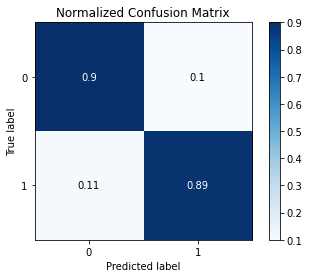

In [ ]:
import scikitplot as skplt
import matplotlib.pyplot as plt
skplt.metrics.plot_confusion_matrix(test_labels, y_predLr, normalize=True)
plt.show()

In [ ]:
skplt.metrics.plot_precision_recall_curve(test_labels, y_predLr)
plt.show()

IndexError: ignored

#**Decision tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf = DecisionTreeClassifier(max_depth = 500, random_state = 0,criterion='gini')

In [ ]:
clf = DecisionTreeClassifier(max_depth = 500, random_state = 0)

In [ ]:
clf.fit(train_features, train_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=500, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
y_preddt = clf.predict(test_features)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_labels,y_preddt))
print(confusion_matrix(test_labels, y_preddt))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1914
           1       0.81      0.82      0.82      1886

    accuracy                           0.82      3800
   macro avg       0.82      0.82      0.82      3800
weighted avg       0.82      0.82      0.82      3800

[[1558  356]
 [ 336 1550]]


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_labels, y_preddt))

0.8178947368421052


In [ ]:
# The score method returns the accuracy of the model
score = clf.score(test_features, test_labels)
print(score)

0.7889390519187359


In [ ]:
scores = cross_val_score(clf, features, labels, cv=5)
print("mean: {:.3f} (std: {:.3f})".format(scores.mean(),
                                          scores.std()),
                                          end="\n\n" )

mean: 0.817 (std: 0.008)



#**SVM**

In [ ]:
from sklearn.svm import SVC

In [ ]:

svclassifier = SVC(kernel='linear')
svclassifier.fit(train_features, train_labels)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = svclassifier.predict(test_features)

Kernel : Sigmoid: 0.88 / Linear: 0.92/ rbf:0.9 / poly : 0.9

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(test_labels,y_pred))
print(classification_report(test_labels,y_pred))

[[1737  177]
 [ 195 1691]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      1914
           1       0.91      0.90      0.90      1886

    accuracy                           0.90      3800
   macro avg       0.90      0.90      0.90      3800
weighted avg       0.90      0.90      0.90      3800



In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_labels, y_pred))

0.9021052631578947


In [ ]:
param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}

In [ ]:
grid = GridSearchCV(SVC(),param_grid,refit = True, verbose=2)

In [ ]:
grid.fit(train_features,train_labels)

In [ ]:
grid.best_params_

In [ ]:
predic = grid.predict(test_features)

In [ ]:
print(classification_report(test_labels,predic))
print(confusion_matrix(test_labels, predic))

#Cross_Val

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn import svm

In [ ]:
clf = svm.SVC(kernel='linear')

In [ ]:
scores = cross_val_score(svclassifier,features, labels, cv=5)
print("mean: {:.3f} (std: {:.3f})".format(scores.mean(),
                                          scores.std()),
                                          end="\n\n" )

mean: 0.879 (std: 0.010)



#**MLP Best params**

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=100)
from sklearn.datasets import make_classification

In [ ]:
parameter_space = {
    'hidden_layer_sizes': [(50,100,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [ ]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(train_features, train_labels)

GridSearchCV(cv=3, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=100, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state...
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['ta

In [ ]:
# Best paramete set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))


Best parameters found:
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.902 (+/-0.007) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.906 (+/-0.004) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'adam'}
0.900 (+/-0.005) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.902 (+/-0.007) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.903 (+/-0.002) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.905 (+/-0.006) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 

In [ ]:
y_true, y_pred = test_labels , clf.predict(test_features)

from sklearn.metrics import classification_report, confusion_matrix
print('Results on the test set:')
print(classification_report(y_true, y_pred))
print(confusion_matrix(y_true, y_pred))

Results on the test set:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1914
           1       0.90      0.91      0.90      1886

    accuracy                           0.90      3800
   macro avg       0.90      0.90      0.90      3800
weighted avg       0.90      0.90      0.90      3800

[[1712  202]
 [ 162 1724]]


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_true, y_pred))

0.9042105263157895


In [ ]:
clf.score(test_features, test_labels)

0.8967268623024831

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scores = cross_val_score(clf, test_labels, y_pred, cv=5)

In [ ]:

scores = cross_val_score(clf, features, labels, cv=5)
print("mean: {:.3f} (std: {:.3f})".format(scores.mean(),
                                          scores.std()),
                                          end="\n\n" )

mean: 0.886 (std: 0.009)



#**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=20, random_state=0)
rf.fit(train_features, train_labels)
y_pred1 = rf.predict(test_features)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_labels,y_pred1))
print(confusion_matrix(test_labels, y_pred1))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1914
           1       0.90      0.84      0.87      1886

    accuracy                           0.88      3800
   macro avg       0.88      0.88      0.88      3800
weighted avg       0.88      0.88      0.88      3800

[[1737  177]
 [ 293 1593]]


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_labels, y_pred1))

0.8763157894736842


In [ ]:
scores = cross_val_score(rf, features, labels, cv=5)

In [ ]:
print("mean: {:.3f} (std: {:.3f})".format(scores.mean(),
                                          scores.std()),
                                          end="\n\n" )

mean: 0.867 (std: 0.013)



In [ ]:
scores = cross_val_score(rf, features, labels, cv=5)
print("mean: {:.3f} (std: {:.3f})".format(scores.mean(),
                                          scores.std()),
                                          end="\n\n" )

mean: 0.871 (std: 0.010)



#**Naive Bayes**

#Gaussian

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_features, train_labels)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred = gnb.predict(test_features)

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(test_labels, y_pred))

Accuracy: 0.8160526315789474


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_labels,y_pred))
print(confusion_matrix(test_labels, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81      1914
           1       0.79      0.86      0.82      1886

    accuracy                           0.82      3800
   macro avg       0.82      0.82      0.82      3800
weighted avg       0.82      0.82      0.82      3800

[[1480  434]
 [ 265 1621]]


*Cross Validation*

In [ ]:
scores = cross_val_score(gnb, test_labels, y_pred, cv=5)

In [ ]:

scores = cross_val_score(gnb, features, labels, cv=5)
print("mean: {:.3f} (std: {:.3f})".format(scores.mean(),
                                          scores.std()),
                                          end="\n\n" )

mean: 0.815 (std: 0.006)



#**Optimized SVC**

In [ ]:
from sklearn.svm import SVC

In [ ]:
model = SVC()

In [ ]:
model.fit(train_features, train_labels)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
prediction = model.predict(test_features)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_labels,prediction))
print(confusion_matrix(test_labels, prediction))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94      1559
           1       0.94      0.83      0.88       913

    accuracy                           0.92      2472
   macro avg       0.92      0.90      0.91      2472
weighted avg       0.92      0.92      0.92      2472

[[1513   46]
 [ 159  754]]


In [ ]:
param_grid = {'C':[1,10],'gamma':[1,0.1], 'kernel':['linear','rbf']}


In [ ]:
grid = GridSearchCV(SVC(),param_grid,refit = True, verbose=2)

In [ ]:
grid.fit(train_features,train_labels)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] C=1, gamma=1, kernel=linear .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................... C=1, gamma=1, kernel=linear, total=  32.9s
[CV] C=1, gamma=1, kernel=linear .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   32.9s remaining:    0.0s


[CV] ...................... C=1, gamma=1, kernel=linear, total=  33.1s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total=  33.8s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total=  33.6s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total=  32.4s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total= 2.4min
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total= 2.4min
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total= 2.4min
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] .

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed: 66.4min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10], 'gamma': [1, 0.1],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [ ]:
grid.param_grid

{'C': [1, 10], 'gamma': [1, 0.1], 'kernel': ['linear', 'rbf']}

In [ ]:
predic = grid.predict(test_features)

In [ ]:
print(classification_report(test_labels,predic))
print(confusion_matrix(test_labels, predic))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1559
           1       0.95      0.81      0.88       913

    accuracy                           0.92      2472
   macro avg       0.93      0.89      0.91      2472
weighted avg       0.92      0.92      0.91      2472

[[1524   35]
 [ 175  738]]


#**Random Forest Optimized**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(random_state=42)

In [ ]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [ ]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(train_features, train_labels)

In [ ]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

In [ ]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=8, criterion='gini')

In [ ]:
rfc1.fit(train_features, train_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:

pred=rfc1.predict(test_features)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_labels,pred))
print(confusion_matrix(test_labels, pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      1061
           1       0.92      0.83      0.88       911

    accuracy                           0.89      1972
   macro avg       0.90      0.89      0.89      1972
weighted avg       0.89      0.89      0.89      1972

[[998  63]
 [153 758]]


In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy for Random Forest on CV data: ",accuracy_score(test_labels,pred))

Accuracy for Random Forest on CV data:  0.8950304259634888


#**XGBoost**

In [ ]:
import xgboost as xgb
modelxgb=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
modelxgb.fit(train_features, train_labels)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
predxgb = modelxgb.predict(test_features)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_labels,predxgb))
print(confusion_matrix(test_labels, predxgb))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1914
           1       0.90      0.81      0.85      1886

    accuracy                           0.86      3800
   macro avg       0.86      0.86      0.86      3800
weighted avg       0.86      0.86      0.86      3800

[[1739  175]
 [ 355 1531]]


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_labels, predxgb))

0.8605263157894737


In [ ]:
modelxgb.score(test_features,test_labels)


0.8493227990970654

In [ ]:
scores = cross_val_score(model, test_labels, test_features, cv=5)

In [ ]:
scores = cross_val_score(modelxgb, features, labels, cv=5)
print("mean: {:.3f} (std: {:.3f})".format(scores.mean(),
                                          scores.std()),
                                          end="\n\n" )

mean: 0.857 (std: 0.009)



In [ ]:

def plot_classification_report(cr, title='Classification report ', with_avg_total=False, cmap=plt.cm.Blues):
    lines = cr.split('\n')
    classes = []
    plotMat = []
    for line in lines[2 : (len(lines) - 6)]:
        t = line.split()
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        plotMat.append(v)

    if with_avg_total:
        aveTotal = lines[len(lines) - 1].split()
        classes.append('avg/total')
        vAveTotal = [float(x) for x in t[1:len(aveTotal) - 1]]
        plotMat.append(vAveTotal)

    plt.figure(figsize=(12,48))
    #plt.imshow(plotMat, interpolation='nearest', cmap=cmap) THIS also works but the scale is not good neither the colors for many classes(200)
    #plt.colorbar()

    plt.title(title)
    x_tick_marks = np.arange(3)
    y_tick_marks = np.arange(len(classes))
    plt.xticks(x_tick_marks, ['precision', 'recall', 'f1-score'], rotation=45)
    plt.yticks(y_tick_marks, classes)
    plt.tight_layout()
    plt.ylabel('Classes')
    plt.xlabel('Measures')
    import seaborn as sns
    sns.heatmap(plotMat, annot=True) 




NameError: ignored

In [ ]:
reportstr = classification_report(test_labels, predxgb)

plot_classification_report(reportstr)

#**Optimized DT**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Same 3-step process

# 1. Instantiate
# default criterion=gini
# you can swap to criterion=entropy 
dtc = DecisionTreeClassifier(random_state=0)

# 2. Fit
dtc.fit(train_features, train_labels)

# 3. Predict, there're 4 features in the iris dataset
y_pred_class = dtc.predict(test_features)

In [ ]:
from sklearn import metrics

In [ ]:
# Accuracy
metrics.accuracy_score(test_labels, y_pred_class)

0.7873333333333333

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_labels,y_pred_class))
print(confusion_matrix(test_labels, y_pred_class))

              precision    recall  f1-score   support

           0       0.79      0.78      0.79      3005
           1       0.78      0.79      0.79      2995

    accuracy                           0.79      6000
   macro avg       0.79      0.79      0.79      6000
weighted avg       0.79      0.79      0.79      6000

[[2343  662]
 [ 614 2381]]


In [ ]:
# Import
from sklearn.model_selection import GridSearchCV

# Define the parameter values that should be searched
sample_split_range = list(range(1, 50))

# Create a parameter grid: map the parameter names to the values that should be searched
# Simply a python dictionary
# Key: parameter name
# Value: list of values that should be searched for that parameter
# Single key-value pair for param_grid
param_grid = dict(min_samples_split=sample_split_range)

# instantiate the grid
dtc = DecisionTreeClassifier(random_state=0)
grid = GridSearchCV(dtc, param_grid, cv=10, scoring='accuracy')

# fit the grid with data
grid.fit(train_features, train_labels)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                               1

In [ ]:

# Single best score achieved across all params (min_samples_split)
print(grid.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(grid.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid.best_estimator_)

In [ ]:
# Entropy of child 1 = 0
# Perfect split for this child

# Entropy of child 2 = 0.918
-(2/3)*np.log2(2/3) - (1/3)*np.log2(1/3)

In [ ]:
# Weighted average of entropy(children)
(3/4)*(0.9184) + (1/4)*0

In [ ]:
# Entropy Gain
1 - (3/4)*(0.9184) + (1/4)*0

#**KNN**

In [ ]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(train_features, train_labels)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(train_features, train_labels)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(test_features, test_labels) 

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [ ]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)

In [ ]:
#Fit the model
knn.fit(train_features,train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [ ]:
knn.score(test_features,test_labels)

KeyboardInterrupt: ignored

In [ ]:
y_pred = knn.predict(test_features)

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(test_labels,y_pred))
from sklearn.metrics import classification_report
print(classification_report(test_labels,y_pred))

[[1719  195]
 [ 202 1684]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      1914
           1       0.90      0.89      0.89      1886

    accuracy                           0.90      3800
   macro avg       0.90      0.90      0.90      3800
weighted avg       0.90      0.90      0.90      3800



In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_labels, y_pred))

0.8955263157894737


In [ ]:
scores = cross_val_score(knn, test_features, test_labels, cv=5)
print("mean: {:.3f} (std: {:.3f})".format(scores.mean(),
                                          scores.std()),
                                          end="\n\n" )
#88%

mean: 0.883 (std: 0.005)

